# **Deep Learning Analysis**

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Deep-Learning/blob/main/Practice4-2_DeepLearning_RegressionClassification_KK.ipynb)

<center><img src='Image/Expert/DataAnalysis_Cycle0.png' width='800'></center>
<center><img src='Image/Expert/DataAnalysis_Cycle1.png' width='800'></center>
<center><img src='Image/Expert/DataAnalysis_Cycle2.png' width='800'></center>
<center><img src='Image/Expert/DataAnalysis_Cycle3.png' width='800'></center>
<center><img src='Image/Expert/DataAnalysis_Cycle4.png' width='800'></center>
<center><img src='Image/Expert/DataAnalysis_Cycle5.png' width='800'></center>
<center><img src='Image/Expert/DataAnalysis_Cycle6.png' width='800'></center>
<center><img src='Image/Expert/DataAnalysis_Cycle7.png' width='800'></center>
<center><img src='Image/Expert/DataAnalysis_Cycle8.png' width='800'></center>
<center><img src='Image/Expert/DataAnalysis_Cycle9.png' width='800'></center>

# **Import Library:** 분석에 사용할 모듈 설치

In [1]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip

In [2]:
# Tensorflow 및 Keras 설치하기
!pip install tensorflow==2.10.*
# !pip install --upgrade --user tensorflow
!pip install -U tensorflow-addons
!pip install keras
# !pip install --upgrade --user keras
!pip install keras-tqdm

In [3]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.get_logger().warning('test')
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, concatenate, Activation, Flatten, Dropout, Reshape
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import plot_model

# Regression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text, export_graphviz
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from xgboost import plot_importance as plot_importance_xgb
from lightgbm import plot_importance as plot_importance_lgbm
from catboost import Pool, CatBoostRegressor
from mlxtend.regressor import StackingRegressor, StackingCVRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text, export_graphviz
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_importance as plot_importance_xgb
from lightgbm import plot_importance as plot_importance_lgbm
from catboost import Pool, CatBoostClassifier
from mlxtend.classifier import StackingClassifier, StackingCVClassifier
from mlxtend.plotting import plot_decision_regions

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# **Regression Problem:** 보스턴 집값 예측

|   **변수**  |              **설명**              |
|:-------:|:------------------------------:|
|  **Price**  |            주택 가격           |
|   **CRIM**  |        1인당 범죄 발생률       |
|    **ZN**   |       주택용 토지의 비율       |
|  **INDUS**  |      비소매 상업지역 비율      |
|   **CHAS**  |    찰스강 인접 여부(인접=1)    |
|   **NOX**   |         일산화질소 농도        |
|    **RM**   |            방의 개수           |
|   **AGE**   | 1940년 이전에 건축된 주택 비율 |
|   **DIS**   |     주요 5대 회사와의 거리     |
|   **RAD**   |         고속도로 접근성        |
|   **TAX**   |             재산세             |
| **PTRATIO** |       교사와 학생의 비율       |
|    **B**    |         흑인 거주 비율         |
|  **LSTAT**  |          저소득층 비율         |

## Linear Regression

**1) 알고리즘 함수세팅:** 

$$
\begin{aligned}
Y \approx \hat{Y} &= f(X_1, X_2, ..., X_k) = w_0 + w_1X_1 + w_2X_2 + \cdots + w_kX_k 
= [w_0~w_1~w_2~\cdots~w_k]\begin{bmatrix} 1 \\ X_1 \\ X_2 \\ \vdots \\ X_k \end{bmatrix} \\
&= [1~X_1~X_2~\cdots~X_k]\begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_k \end{bmatrix} 
= \begin{bmatrix} 1~X_{11}~X_{21}~\cdots~X_{k1} \\ 1~X_{12}~X_{22}~\cdots~X_{k2} \\ \vdots \\ 1~X_{1t}~X_{2t}~\cdots~X_{kt} \end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_k \end{bmatrix} = XW = WX
\end{aligned}
$$

---

<center><img src='Image/Expert/Example_LinearRegression.png' width='900'></center>

**2) 함수 추정을 위한 비용함수:** 나의 주장 기반 알고리즘의 `예측값`($\hat{Y}$)과 `실제 데이터`($Y$)의 차이를 평가하는 함수
> - **손실함수(Loss Function):** `하나의 데이터(Single Row)`에서 예측값과 정답의 차이를 평가
> - **비용함수(Cost Function):** `모든 데이터`에서 예측값과 정답의 차이를 평가
> 
> $$
\begin{aligned}
Y - \hat{Y} &= Y - WX = \text{residual} = \text{cost} \\
&= \sum_{i=1}^{m} \left[ \sum_{j=1}^{k} (Y_{i} - w_{j}X_{j}) \right]
\end{aligned}
$$
>
>
> - `회귀분석`은 여러가지의 비용함수 중 `최소제곱법/최소자승법`을 사용 
> - `최소제곱법/최소자승법`를 최소로 하는 `직선`을 추정하여 `계수(coefficient)`를 결정
>
$$
\begin{aligned}
\hat{W} = \underset{W}{\arg\min} \sum_{i=1}^{m} \left[\sum_{j=1}^{k} (Y_{i} - w_{j}X_{j})^2 \right]
\end{aligned}
$$


<!-- - **비선형변수 효과:** 로그 또는 제곱근 등의 변환된 변수 사용시 회귀분석 성능 향상 가능
    - 독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우
    - 독립 변수와 종속 변수간의 관계가 곱셈 혹은 나눗셉으로 연결된 경우
    - 종속 변수와 예측치가 비선형 관계를 보이는 경우 -->

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          2.71e-105
Time:                        00:16:16   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1290      2.030      8.439      0.000      13.138      21.120
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0         7.7912      1.035      7.528      0.000       5.756       9.826
CHAS_1         9.3378      1.235      7.559      0.000       6.909      11.767
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     4.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

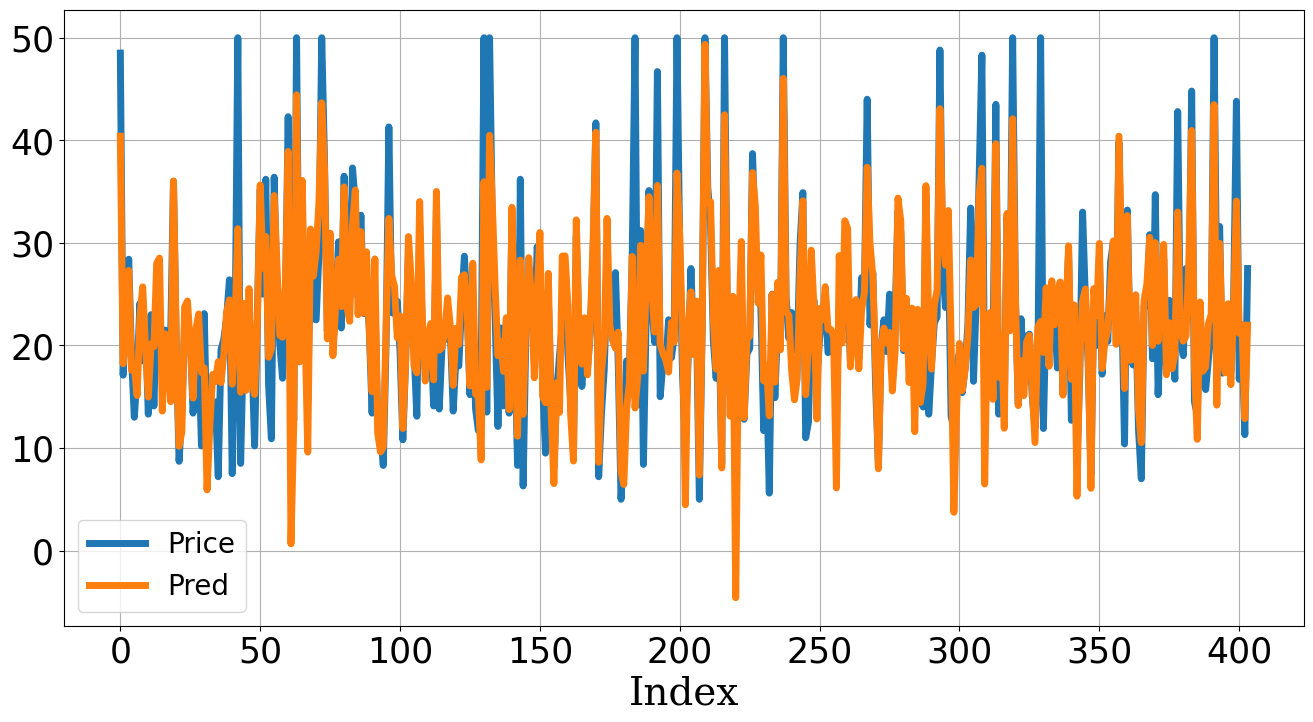

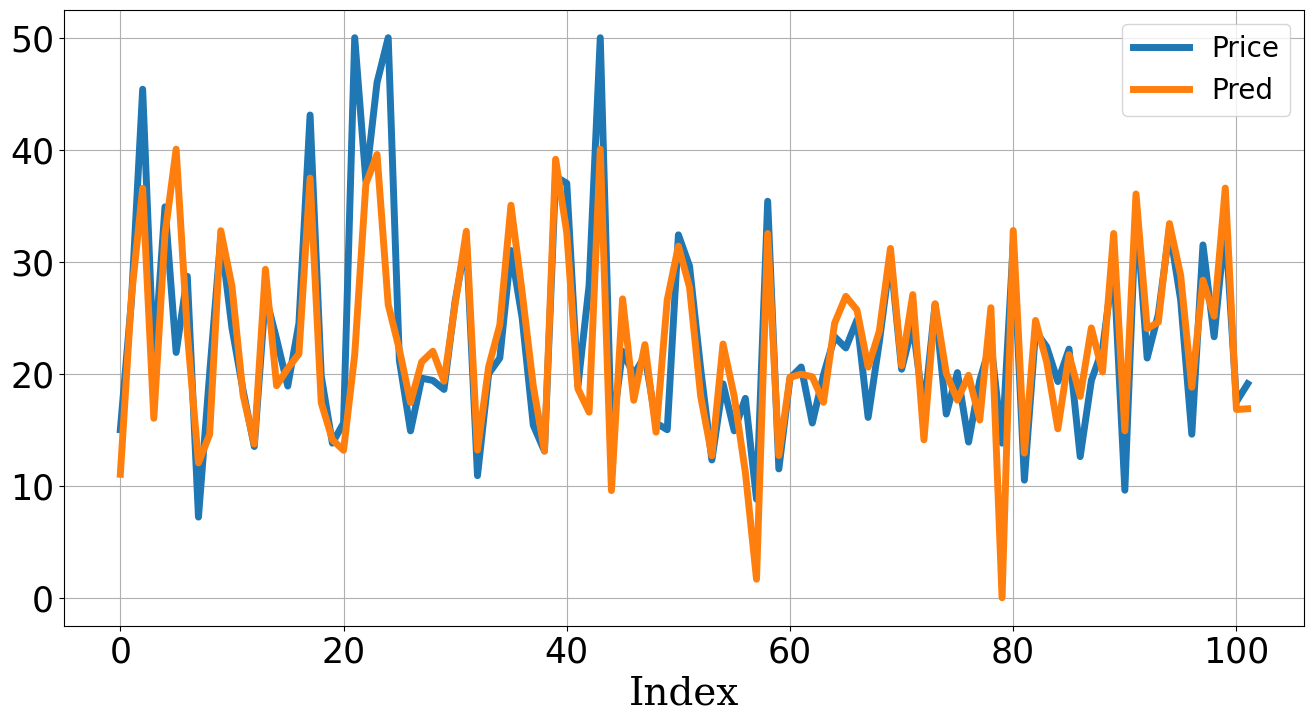

MAE   MSE  MAPE
Train 3.07 21.05  0.16
Test  3.51 31.34  0.17

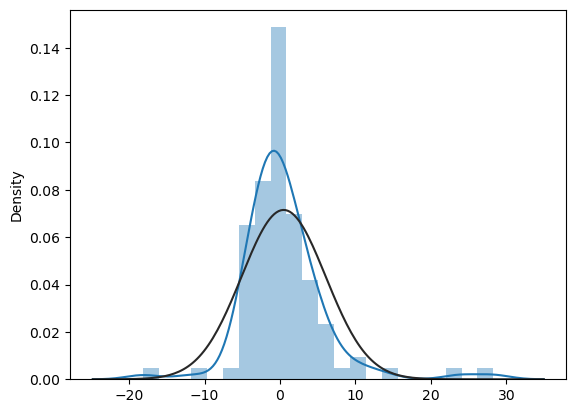

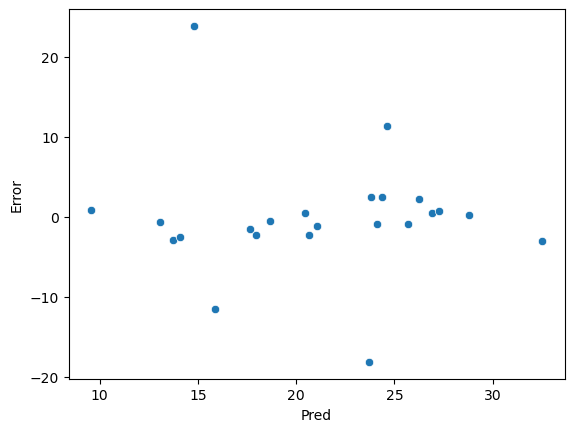

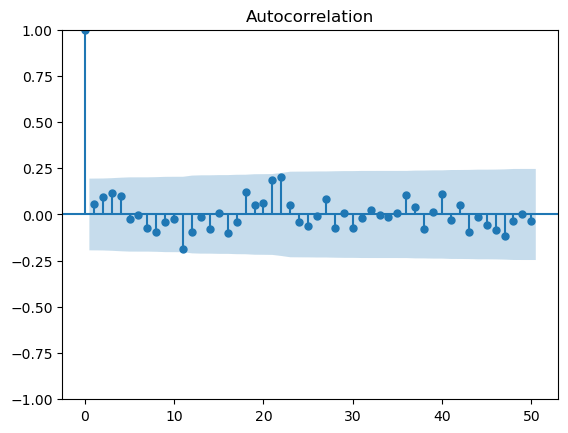

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.83               0.13             5.77   
p-value               0.00               0.00             0.83   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            41.83  
p-value                     0.79  
Alternative                  NaN

In [4]:
# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Linear Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
model_lr = sm.OLS(Y_train, X_train_fes).fit()
display(model_lr.summary())

Y_trpred = pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test_fes), columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_lr = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_lr)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Random Forest (Bagging)

**"데이터를 `복원샘플링`하여 나눈 샘플들로 `같은 알고리즘`으로 학습 후 `보팅` 방식으로 최종 예측"**

<center><img src='Image/Expert/Ensemble_Bagging.jpg' width='400'></center> 

(404, 13) (404, 1)
(102, 13) (102, 1)


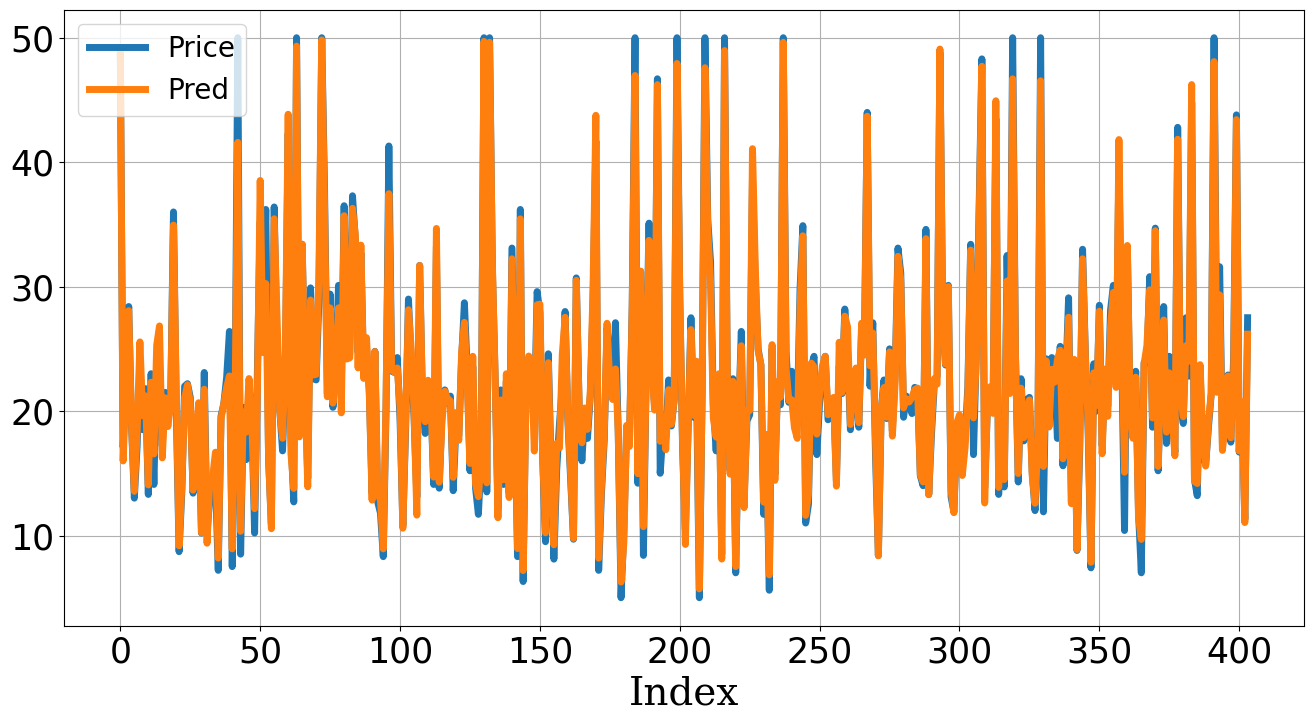

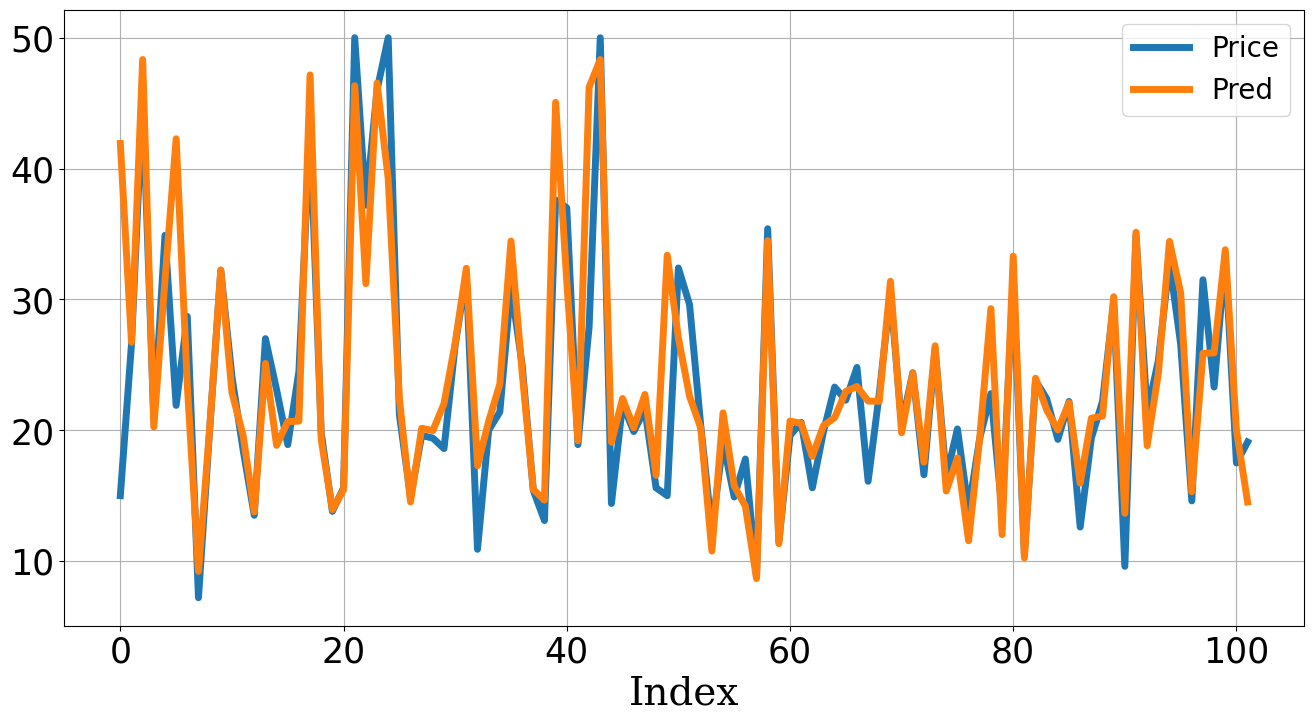

MAE   MSE  MAPE
Train 0.86  1.55  0.04
Test  2.71 25.67  0.13

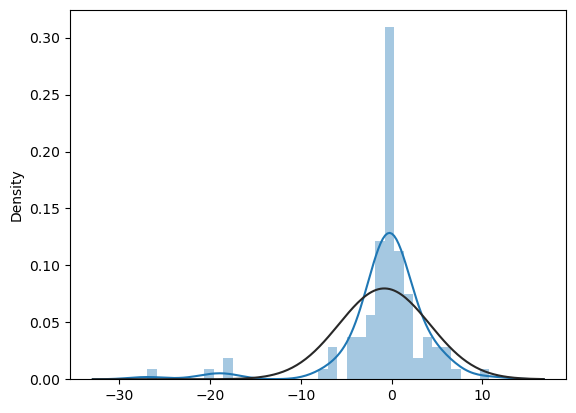

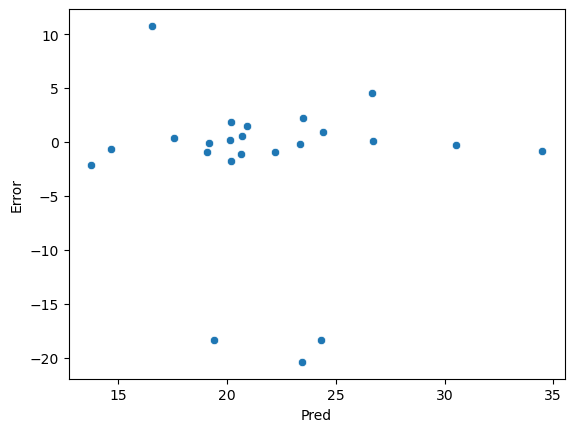

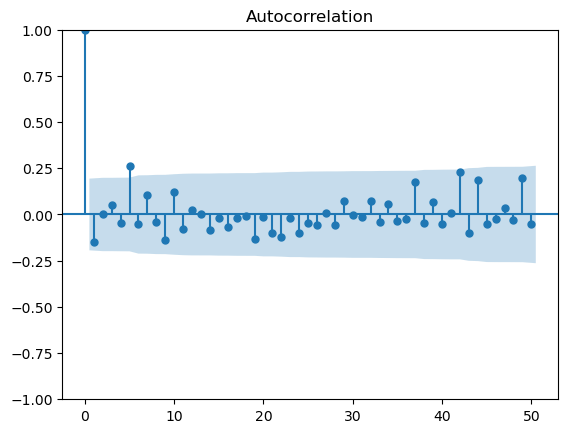

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.73               0.12            15.91   
p-value               0.00               0.00             0.10   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            62.15  
p-value                     0.12  
Alternative                  NaN

In [5]:
# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=123)
model_rf.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_rf.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_rf.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_rf = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_rf)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## XGBoost (Boosting)

**"여러개의 알고리즘이 `순차적으로 학습`하되, `첫 알고리즘`이 `전체 데이터`를 학습하고 앞선 알고리즘에서 잘 학습되지 않은 `오차/에러`에 중요도를 높여 `가중치`를 부여하고 반복적으로 `모델링 업데이트`를 위한 학습 및 예측"**

- **장점:** 

> - Bagging과 달리 `맞추기 어려운 문제`를 `학습`하는데 특화
> - 학습되지 않은 패턴을 계속 반영하기 `Bias를 줄이는데 효과적`
> - `Outlier`나 `Anomaly Detection`에 강함

- **단점:** 

> - `잘 학습된 특징`들은 중요도를 낮춰 `덜 고려함`
> - 학습하지 못한 데이터 패턴들을 학습하기 때문에 `직렬처리로 느린 편`

<center><img src='Image/Expert/Ensemble_Boosting.jpg' width='400'></center> 

(404, 13) (404, 1)
(102, 13) (102, 1)


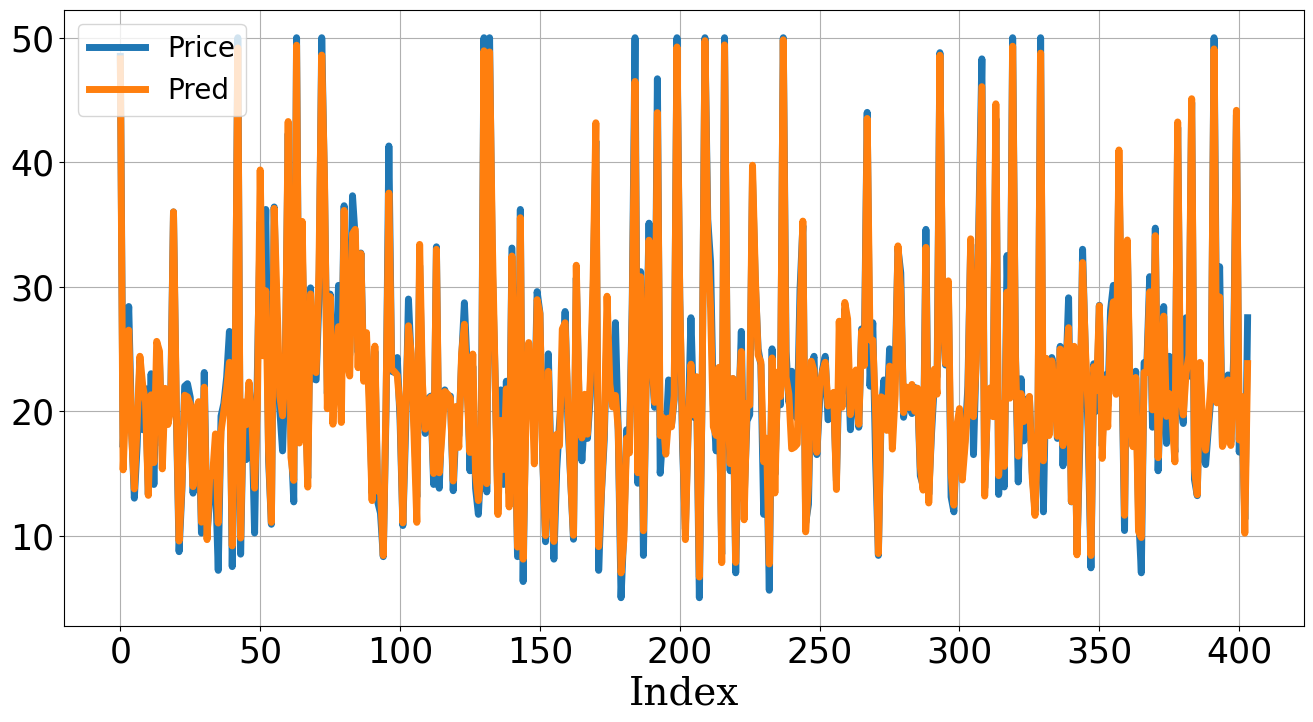

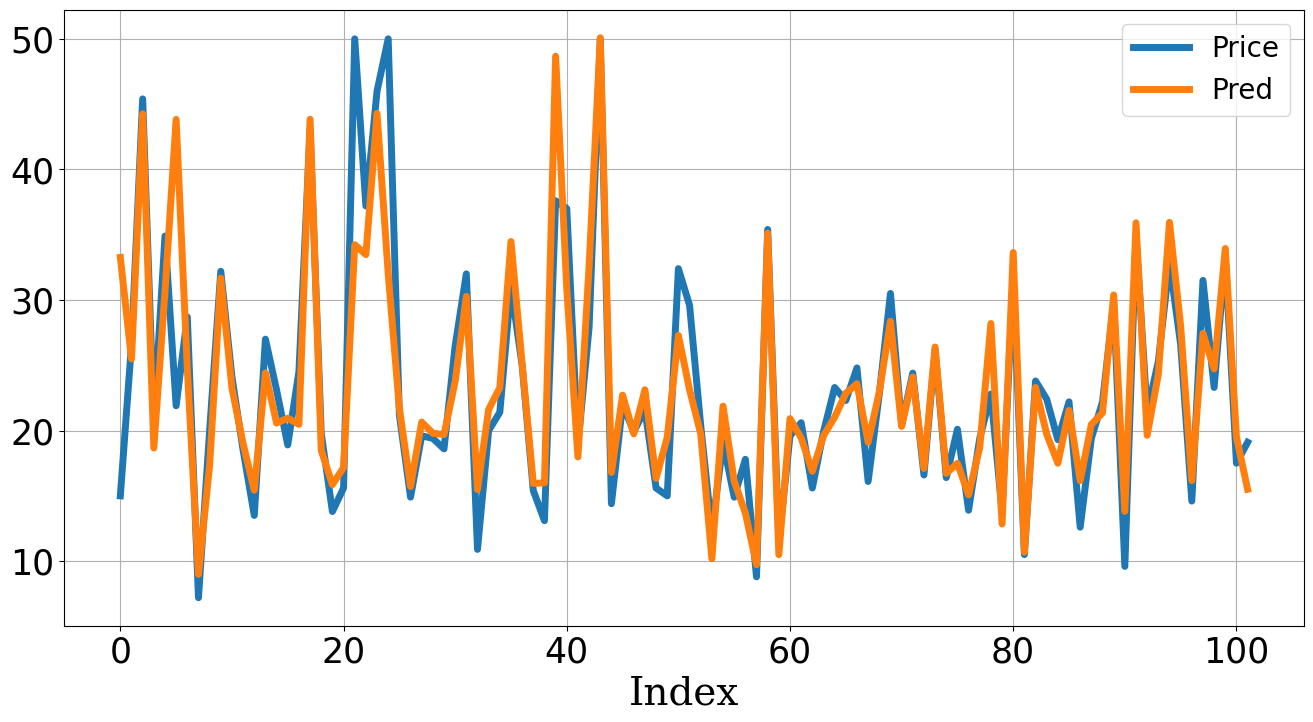

MAE   MSE  MAPE
Train 1.21  2.49  0.06
Test  2.58 20.04  0.12

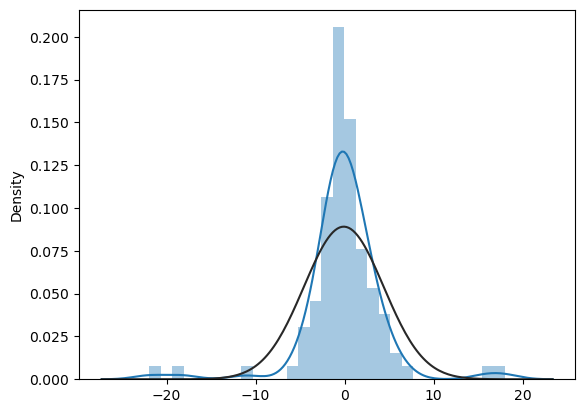

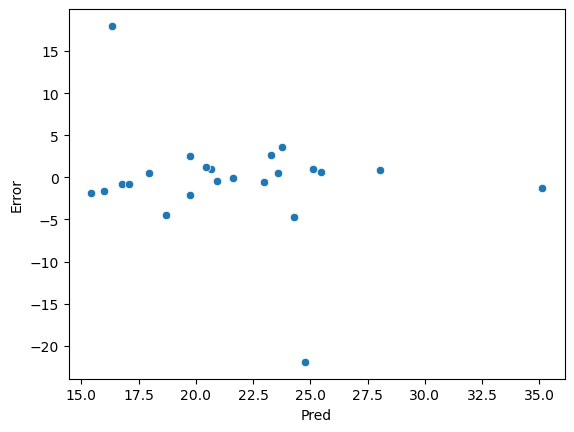

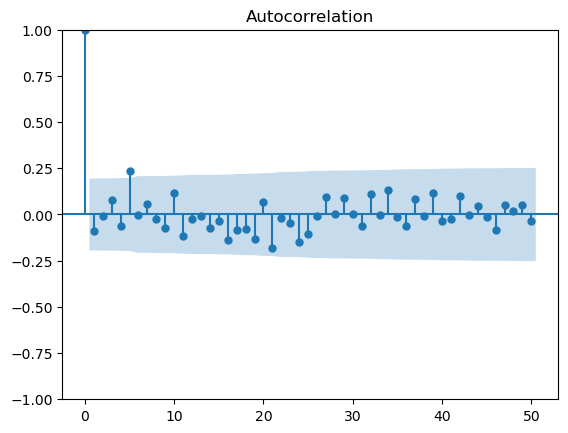

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.77               0.08            10.55   
p-value               0.00               0.00             0.39   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            46.18  
p-value                     0.63  
Alternative                  NaN

In [6]:
# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# XGBoost
model_xgb = XGBRegressor(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=3, random_state=123)
model_xgb.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_xgb.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_xgb.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_rf = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_rf)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Multi-Layered Perceptron

**1) 방향:** 인공신경망의 `비선형성 접근 필요성`으로  `은닉층`을 반영항 `다층/심층신경망으로 딥러닝을 출발시킴`

- `2개의 직선` 또는 `여러개의 직선이 결합된 1개의 곡선`을 이용하여 제대로 분류가 가능할 것이라 가정
- `다층(여러개의 직선)신경망`으로 비선형 문제를 해결 (Hinton, 1986)  

<center><img src='Image/Expert/DL_Compare_MLP.jpg' width='500'></center>

- 여러문제가 해결되면서 `은닉층을 늘려 학습 결과를 향상`시키는 방법이 등장하며 `DNN(Deep Neural Network)`라고 함

<center><img src='Image/Expert/DL_ANN_MLP.bmp' width='600'>(https://4ir.kisti.re.kr/)</center>

- 은닉층의 수가 증가하면 더욱 어려운 문제를 풀수 있는데, 통상 `은닉층을 최소 2개이상 가진 알고리즘`을 `딥러닝(Deep Learning)` 알고리즘 이라고 함

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

**2) 한계:** 층(Layer)의 수가 많아지면서 `늘어나는 Weights를 수동으로 학습하기에 한계`가 있기에 여전히 데이터 학습 불가

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense (Dense)               (None, 128)               2432      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0
_________________________________________________________________


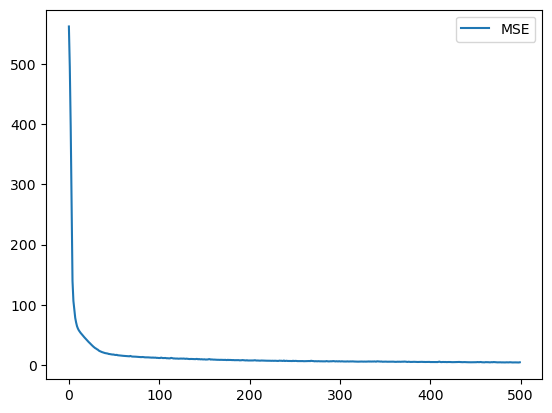

4/4 [==============================] - 0s 2ms/step


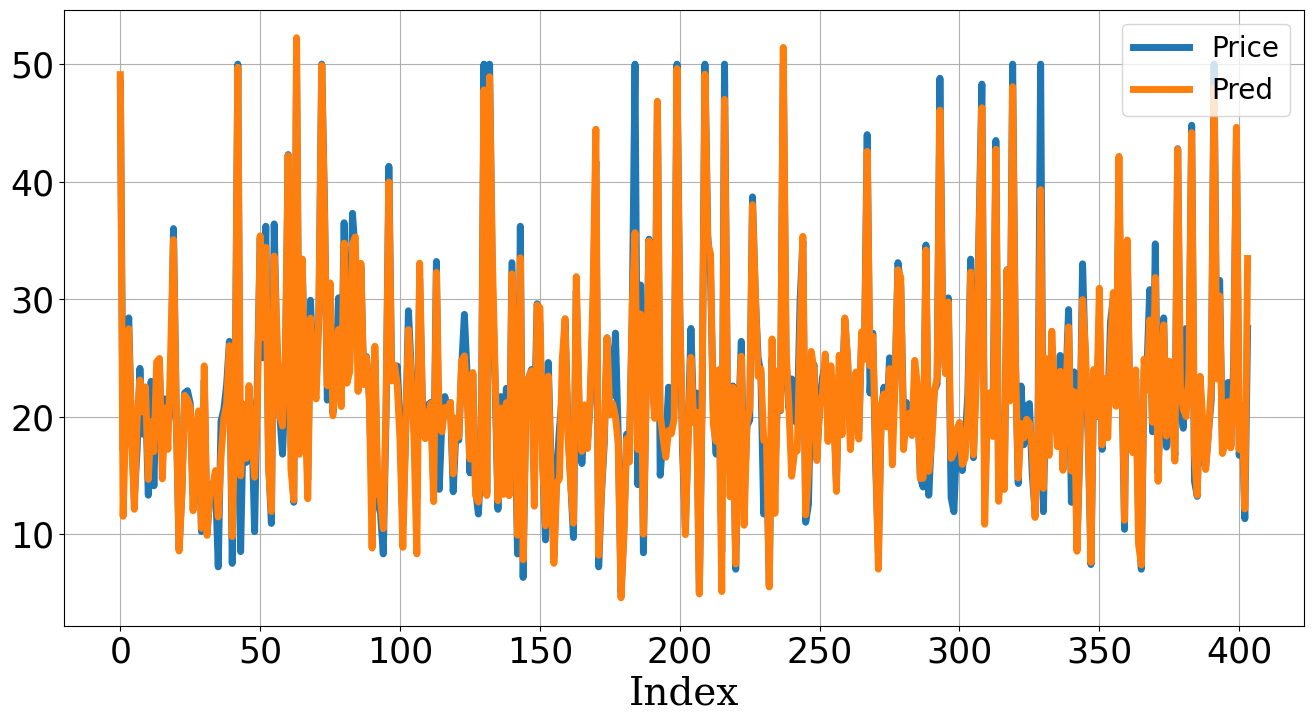

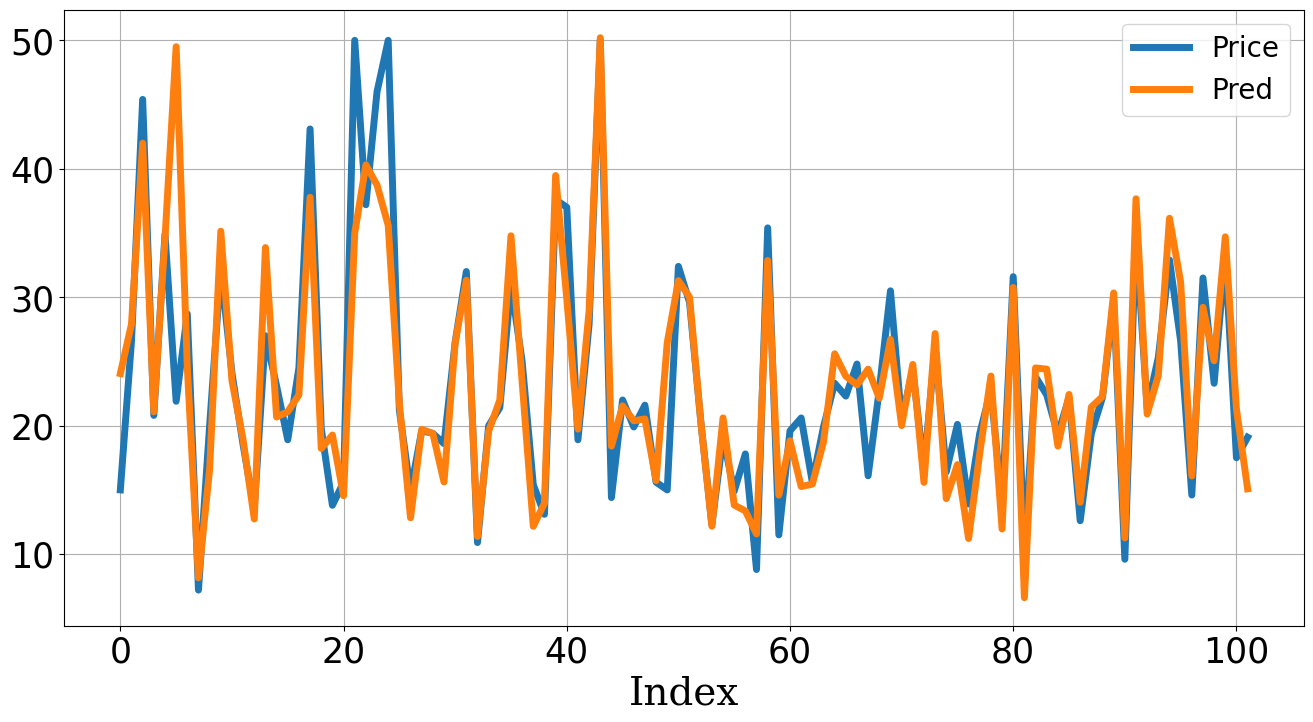

MAE   MSE  MAPE
Train 1.35  4.13  0.07
Test  2.62 20.41  0.12

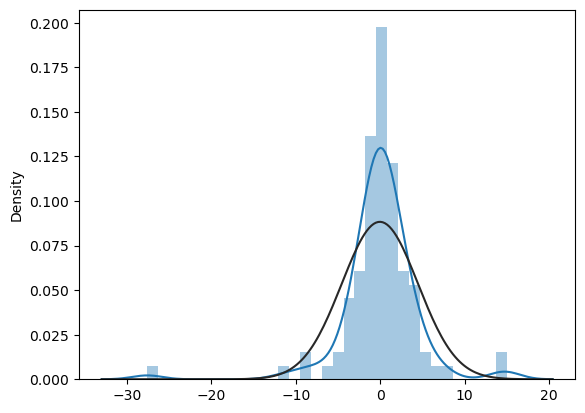

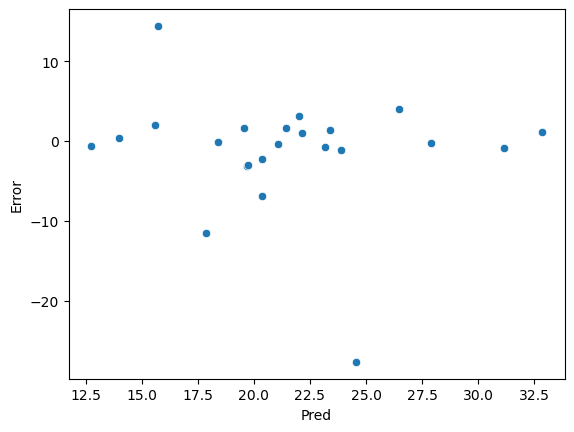

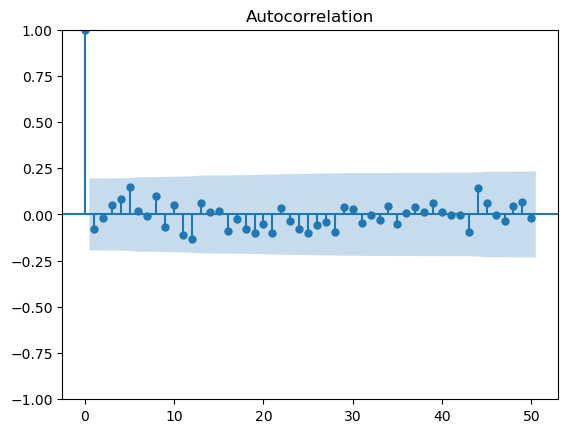

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.79               0.17             6.33   
p-value               0.00               0.00             0.79   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            30.12  
p-value                     0.99  
Alternative                  NaN

In [7]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
LOSS = 'mse',
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)


# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])


# 분석 검증
Score_nn = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Comparison of Modeling Codes

```python
# Linear Regression
model_lr = sm.OLS(Y_train, X_train_fes).fit()

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=123)
model_rf.fit(X_train_fes, Y_train)

# XGBoost
model_xgb = XGBRegressor(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=3, random_state=123)
model_xgb.fit(X_train_fes, Y_train)

# MLP
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  

model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
```

# **Performance Update**

> - **하이퍼파라미터 튜닝:** 실행마다 결과는 달라질 수 있고 `비용함수를 수동으로 최소로 만드는 것`
> - **인공지능 개발:** 하이퍼파라미터 튜닝으로 `낮은 비용함수와 높은 예측성능`을 획득 하는 것

## Increasing Hidden Layers

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_3 (Dense)             (None, 256)               4864      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 48,129


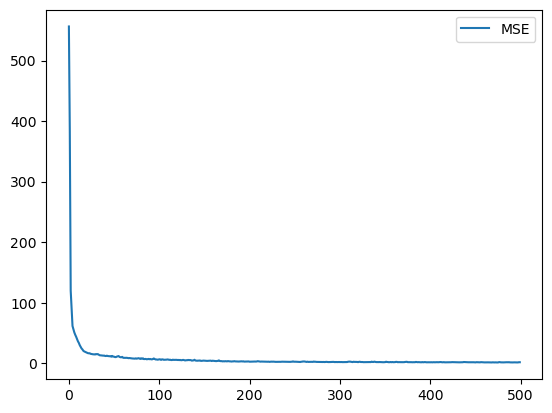

4/4 [==============================] - 0s 5ms/step


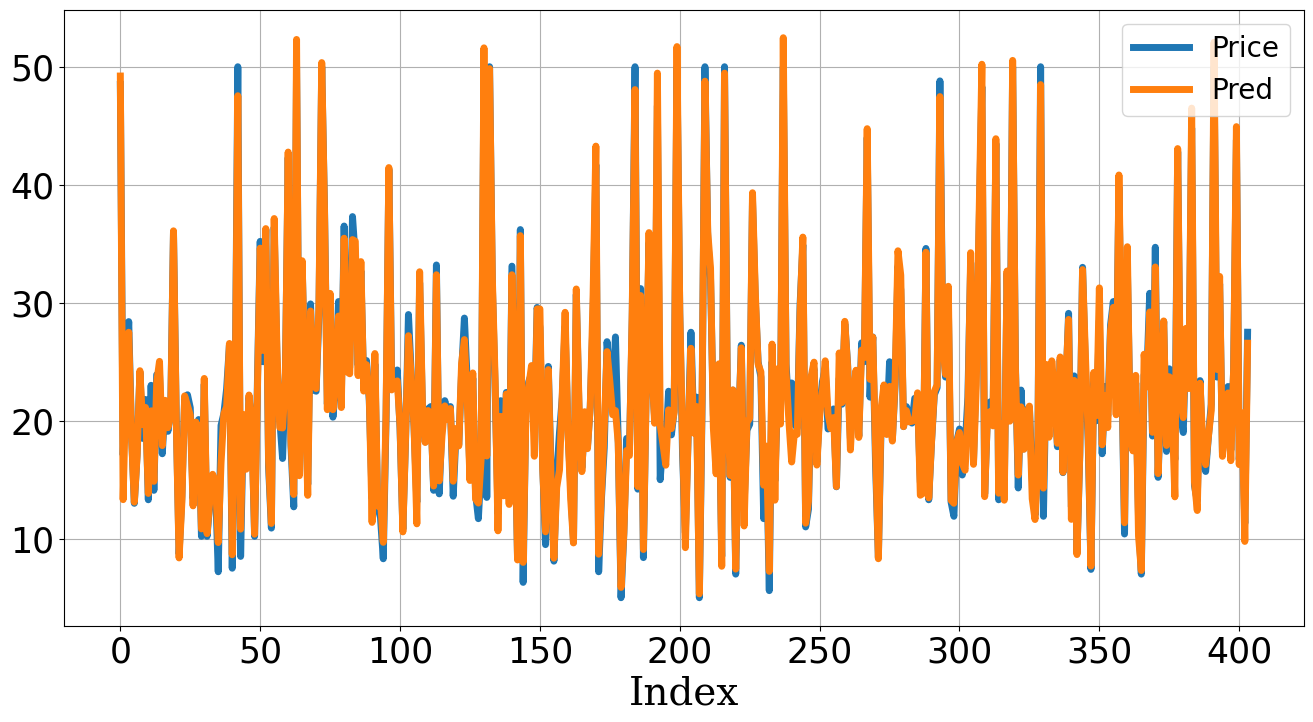

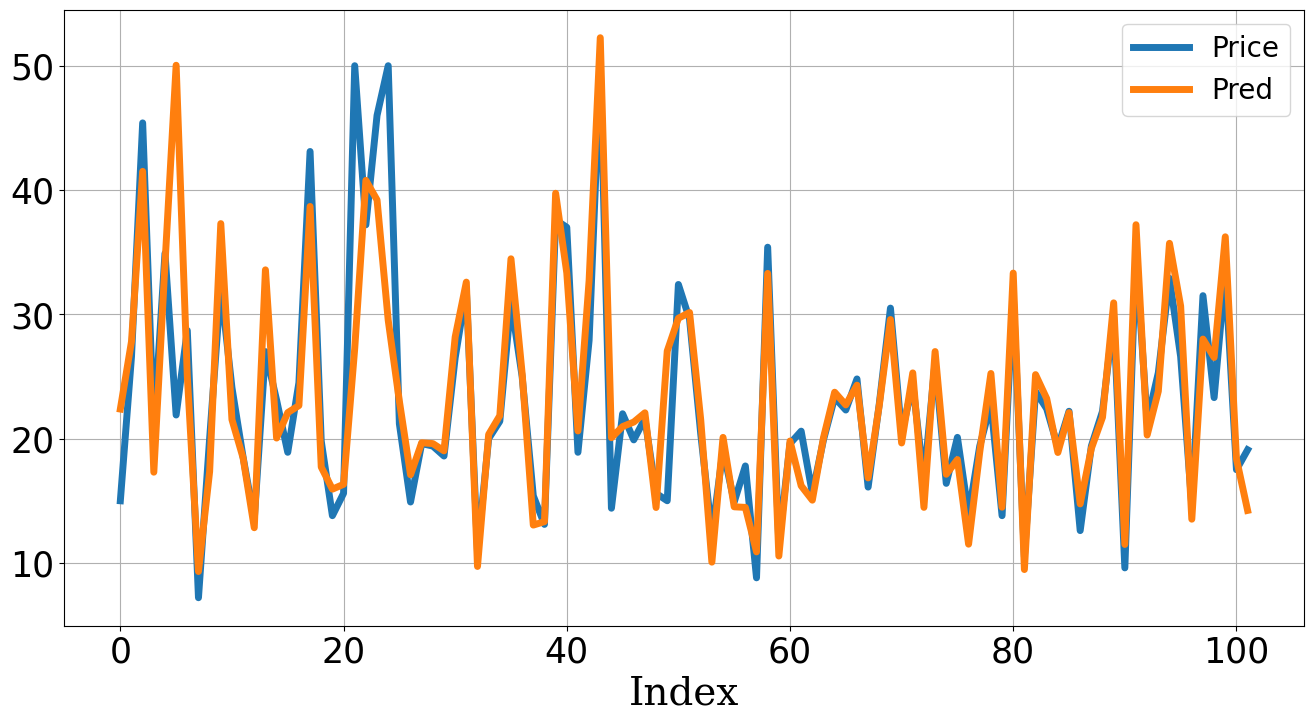

MAE   MSE  MAPE
Train 0.83  1.33  0.04
Test  2.63 24.25  0.11

In [8]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)


# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_deep = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_deep)


## Regularization

> **"`추정 가중치가 커지면` 활성함수를 통해 `기울기가 급변`하게되어 비용함수 최소화가 어렵고 `과적합 높아짐`"**   
>
> **(0) Linear Regression:** `MSE`를 비용함수로 사용
>
> <center> $\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2\Biggr]$ </center>
>
> **(1) L1 Panelty:** `LASSO Regression`에 사용한 비용함수 반영    
>
> \begin{align*}
\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k \left|w_i \right|\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}
>
> - `중요도가 낮은 변수`의 가중치는 0으로 출력하여 과적합 방지
> - `변수선택 효과`가 있어 모델 복잡도를 효과적으로 제약
> - 샘플 수보다 변수가 많더라도 변수선택 효과 때문에 `고차원의 데이터도 적용가능`
> - `패널티의 정도`는 Hyperparameter로 사전 결정되며 교차검증이나 유사 방법으로 결정
> - `모델에 제약`을 주며 정확도를 상승시킴   
>
> **(2) L2 Panelty:** `Ridge Regression`에 사용한 비용함수 반영   
>
> \begin{align*}
\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k w_i^2\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}
>
> - `모든 가중치`를 일률적으로 `작게 만드는 경향`
> - `중요도 낮은 변수`라도 0이 아닌 가중치를 출력하므로 `일반화 및 변수비교 효과`
> - 일반화 및 패널티 효과를 높이기 위해 `L1 보다 L2를 많이 사용하는 경향`

<center><img src='Image/Expert/DL_CF_L1L2.png' width='600'></center>

<center><img src='Image/Expert/DL_CF_L1L2_Compare.png' width='600'></center>
<!-- (https://kevinthegrey.tistory.com/110) -->

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_8 (Dense)             (None, 256)               4864      
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 48,129


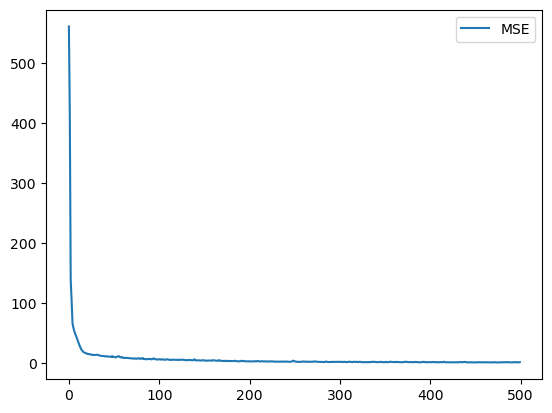

4/4 [==============================] - 0s 2ms/step


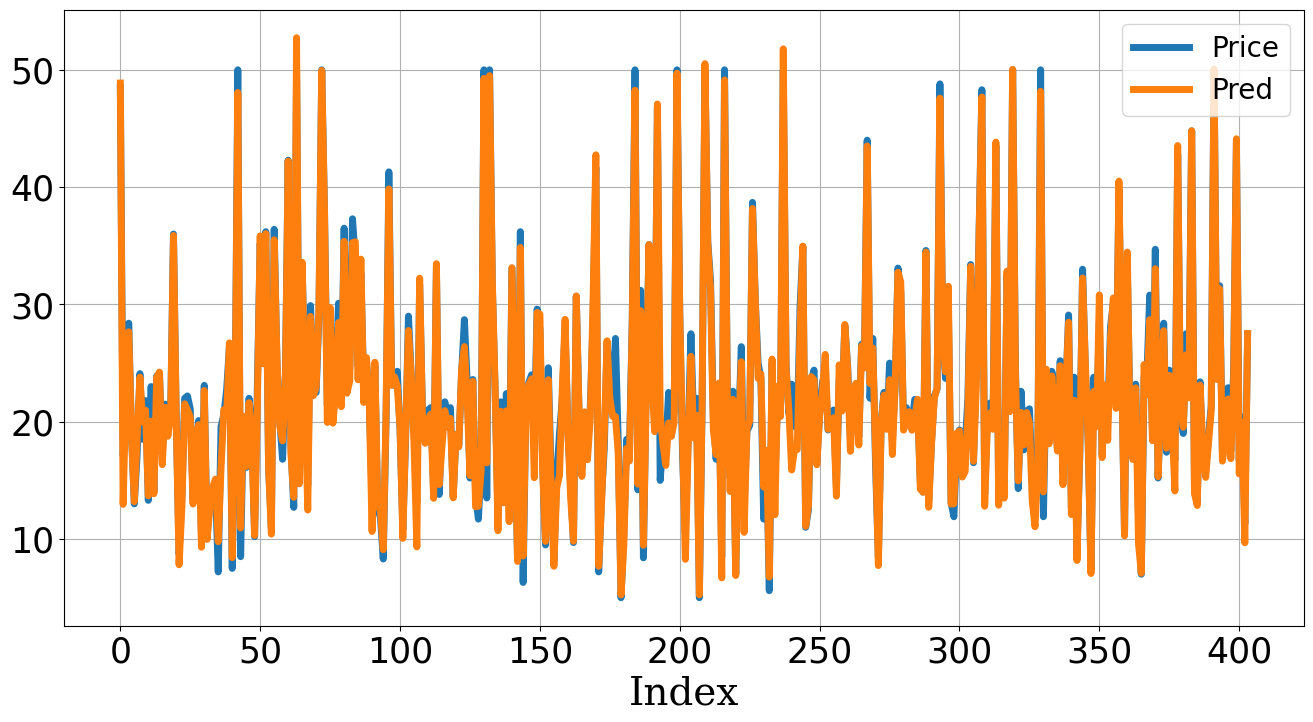

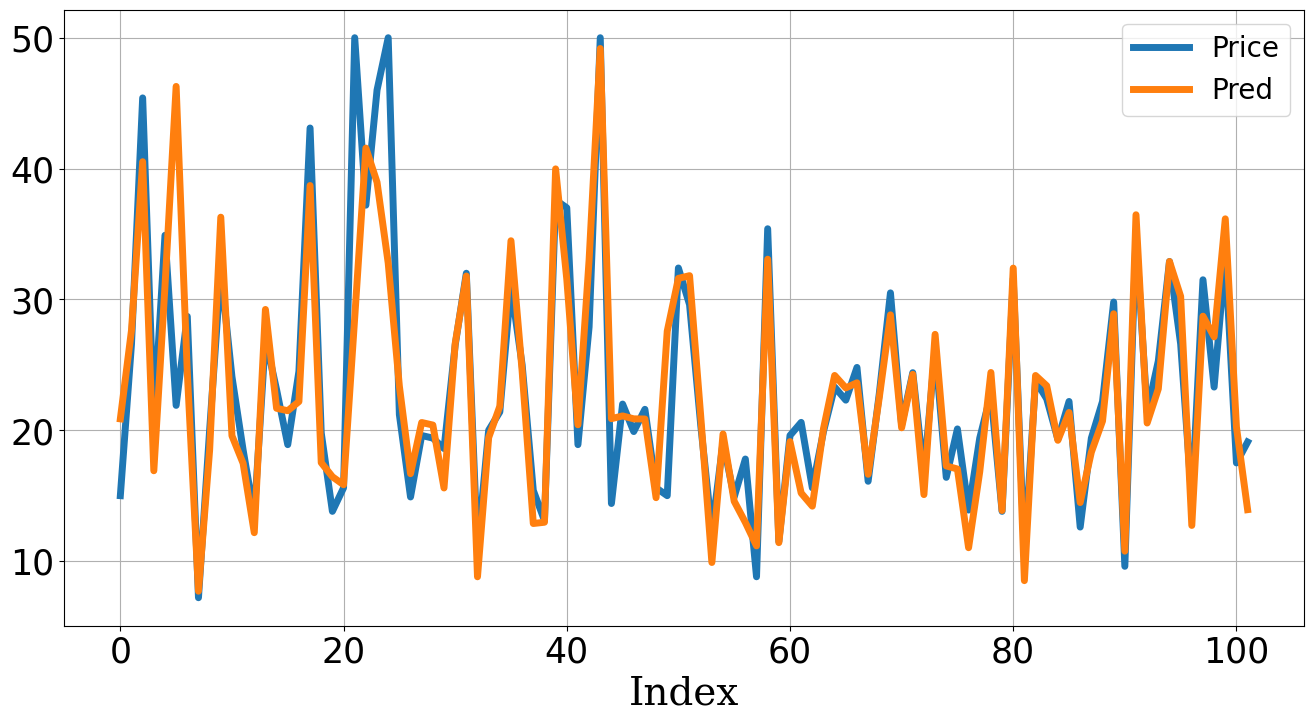

MAE   MSE  MAPE
Train 0.85  1.52  0.05
Test  2.64 21.07  0.12

In [9]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)


# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_regul = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_regul)


## Drop Out

> **"`모든 직원`이 함께 일하는 것 < `소그룹`의 결과를 통합하는 것 $\rightarrow$ 더욱 효율적일수도"**    
>
> **"각 단계의 줄어든 뉴런은 약한 학습이지만 `약한 모델들이 합쳐져 강력한 예측력`"**   
>
> - `Labeled 데이터의 부족`과 `Overfitting 문제 해결`을 위해 Drop Out 제안 (Hinton et al. 2012)
> - 학습할 때마다 `일부 유닛만을 사용하고 이를 반복해서 합치는 방식`으로 `Ensemble과 유사`
> - 빠진 뉴런들로 예측 하기에 `여러개의 국소적 독립적 내부패턴 학습가능`
> - 네트워크가 `뉴런의 특정 가중치에 덜 민감해짐`
> - `더욱 일반화에 기여가 가능`하고 훈련 데이터에만 과적합 가능성 적어짐
> - 너무 낮은 비율은 효과가 적고 너무 높은 비율은 과소적합 하기에 `20~50% 권장`
> - 일반적으로 `Learning Rate(LR, 10->100)과 Momentum(0.9 or 0.99)을 높여 사용`
> - LR을 높여 가중치의 크기를 줄이면 Ridge와 유사하게 `과적합이 줄어 높은 성능`

<center><img src='Image/Expert/DL_DropOut.png' width='500'></center>
<!-- (https://t1.daumcdn.net/cfile/tistory/99324B335D383CBD1B) -->

> - 랜덤한 뉴런을 사용하는 것 대신, `연결선을 랜덤하게 사용하는 DropConnect 방법`도 존재 (Wan et al. 2013)

<center><img src='Image/Expert/DL_Dropout_Dropconnect.png' width='700'></center>

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_13 (Dense)            (None, 256)               4864      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout) 

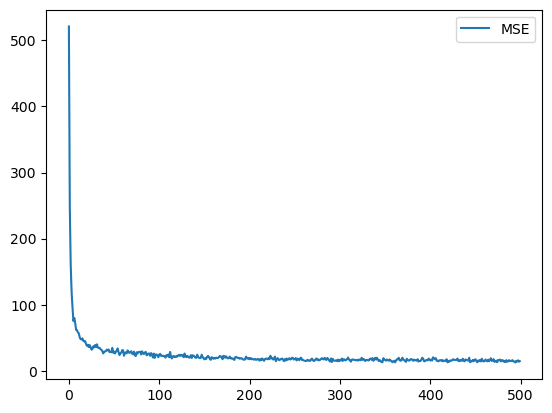

4/4 [==============================] - 0s 2ms/step


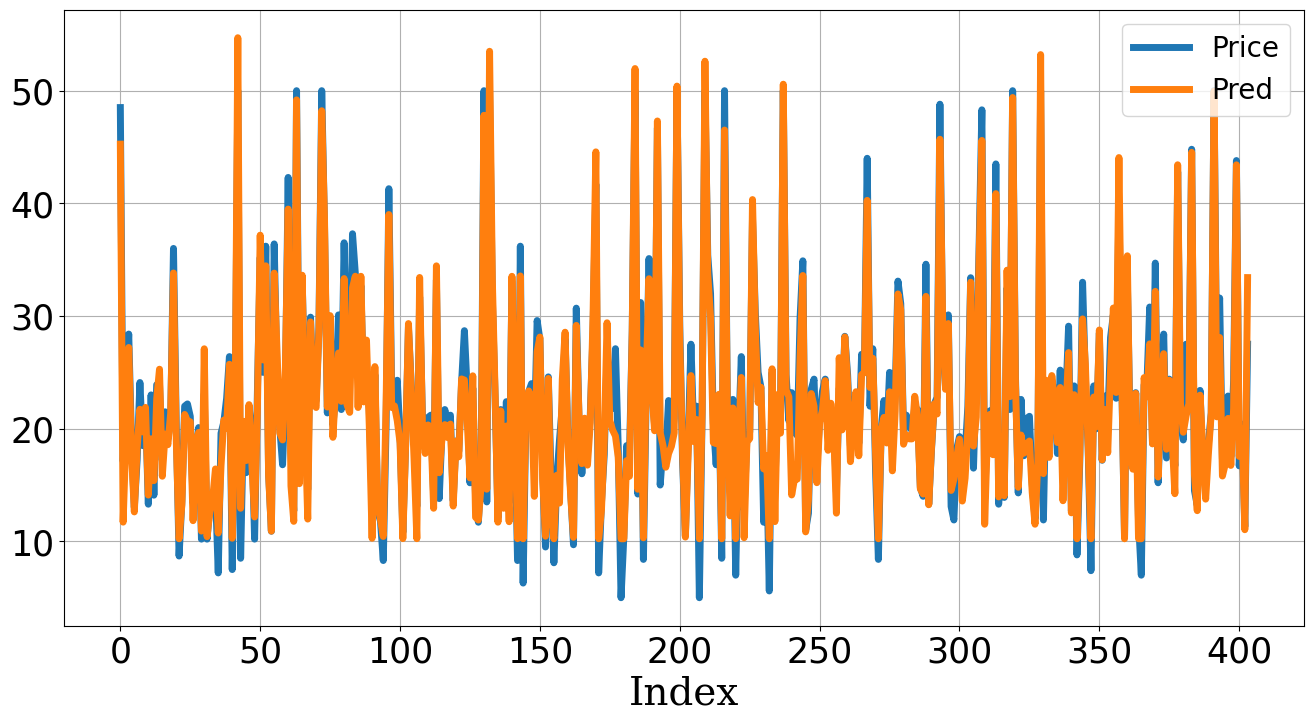

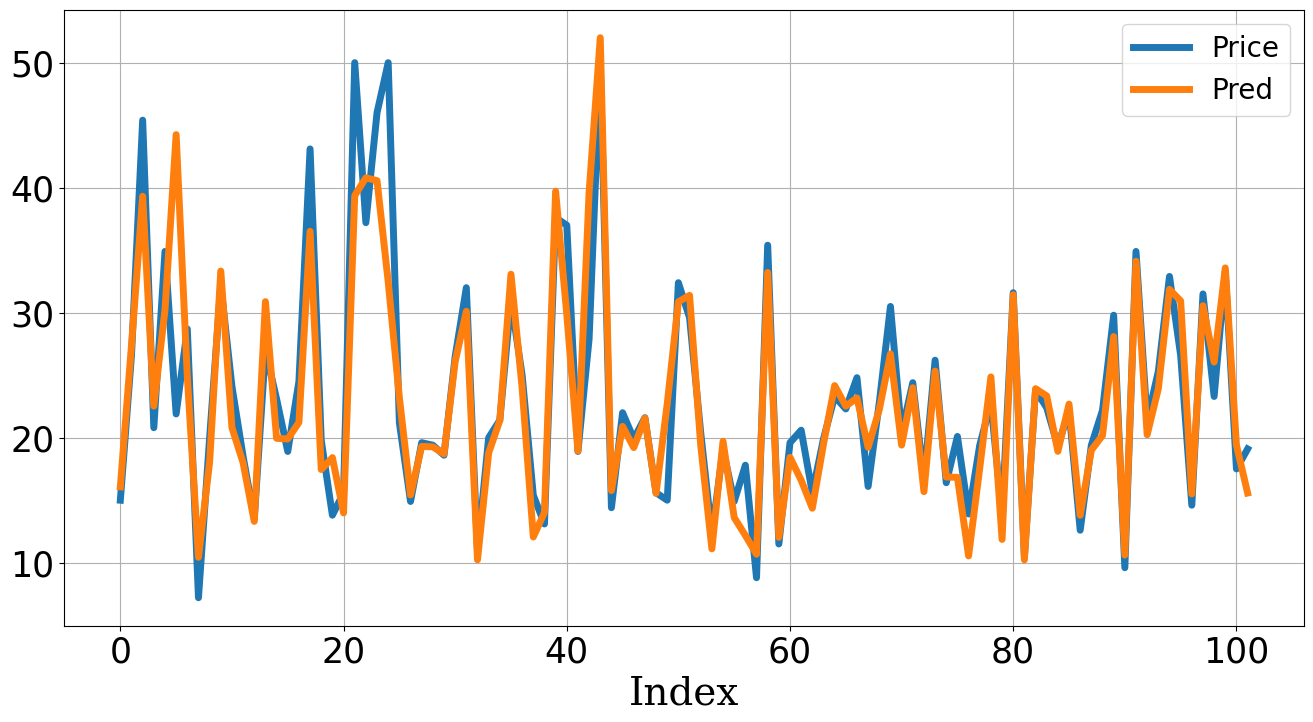

MAE   MSE  MAPE
Train 1.53  4.12  0.08
Test  2.37 16.24  0.10

In [10]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)


# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_dropout = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_dropout)


## Early Stopping

> **"데이터가 Train/Validation/Test로 구분되어 있을때, `Validation/Test의 비용함수가 낮으면 멈추므로 Train을 계속 학습하는 과적합 가능성 낮춤`"**   

<center><img src='Image/Expert/DL_Overfitting_Epoch.png' width='600'></center>

<center><img src='Image/Expert/DL_Overfitting_EarlyStopping.png' width='600'></center>
<!-- (https://kevinthegrey.tistory.com/110) -->

### Basic

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_18 (Dense)            (None, 256)               4864      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout) 

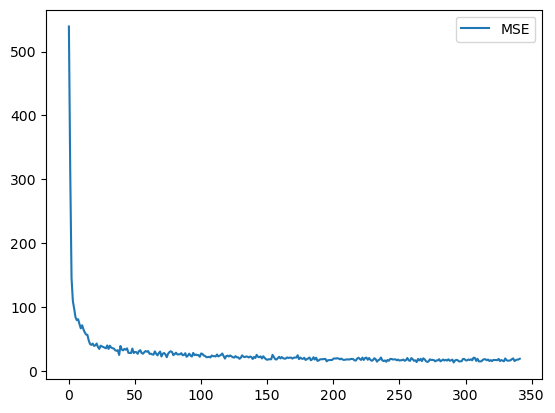

4/4 [==============================] - 0s 6ms/step


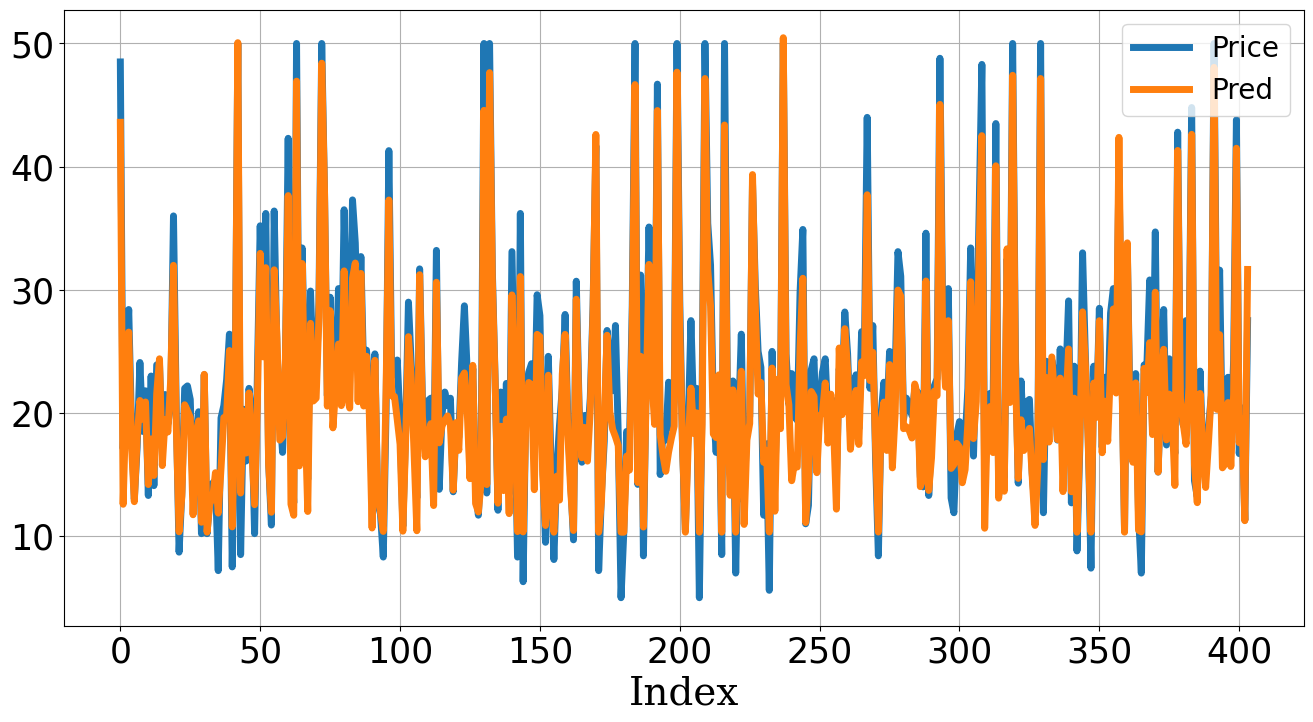

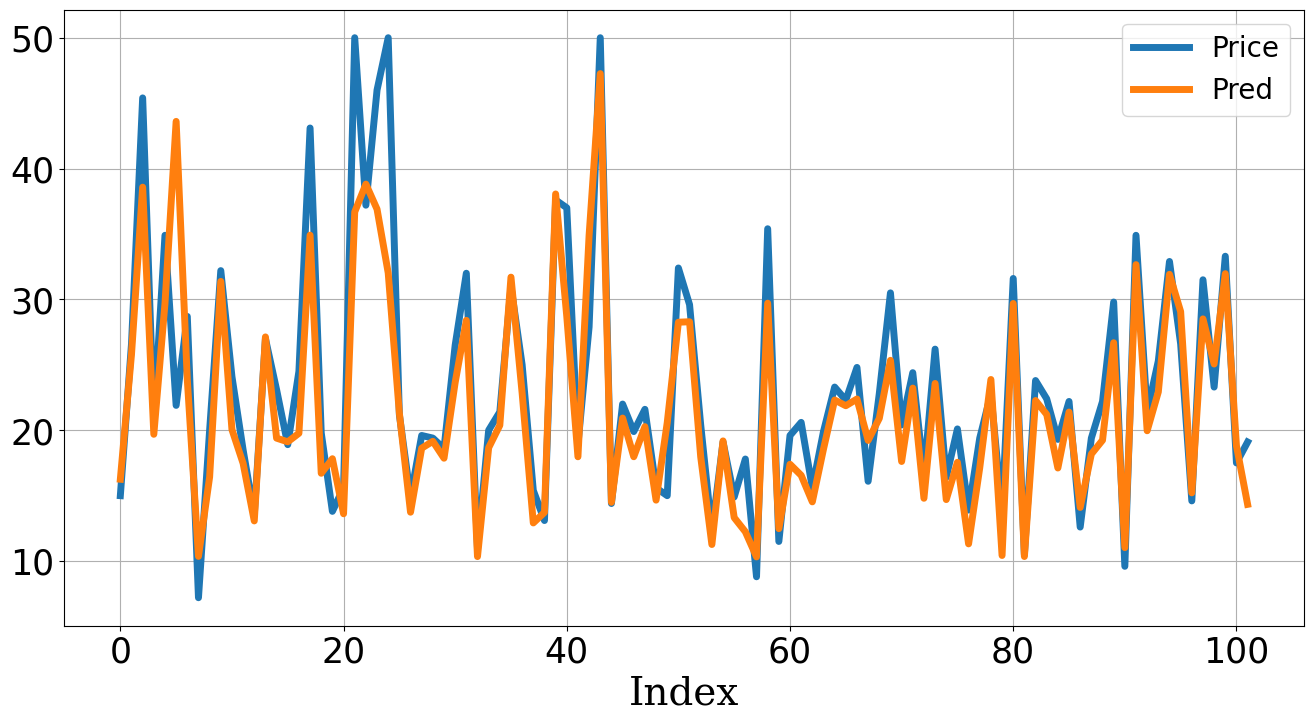

MAE   MSE  MAPE
Train 2.00  6.40  0.10
Test  2.75 18.14  0.12

In [11]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
CALLBACK = [callbacks.EarlyStopping(monitor='loss', mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

### Progress Bar

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_23 (Dense)            (None, 256)               4864      
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)

Training:   0%|                                                                                               …

Epoch 144: early stopping


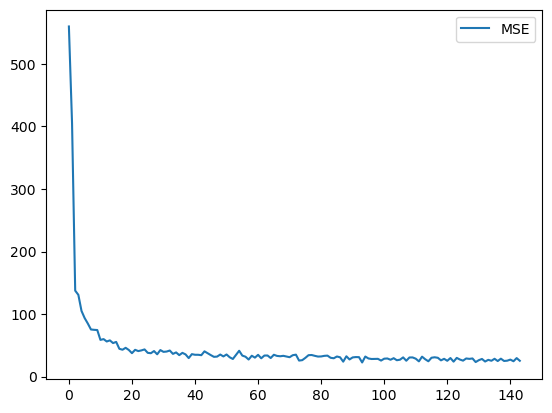

4/4 [==============================] - 0s 3ms/step


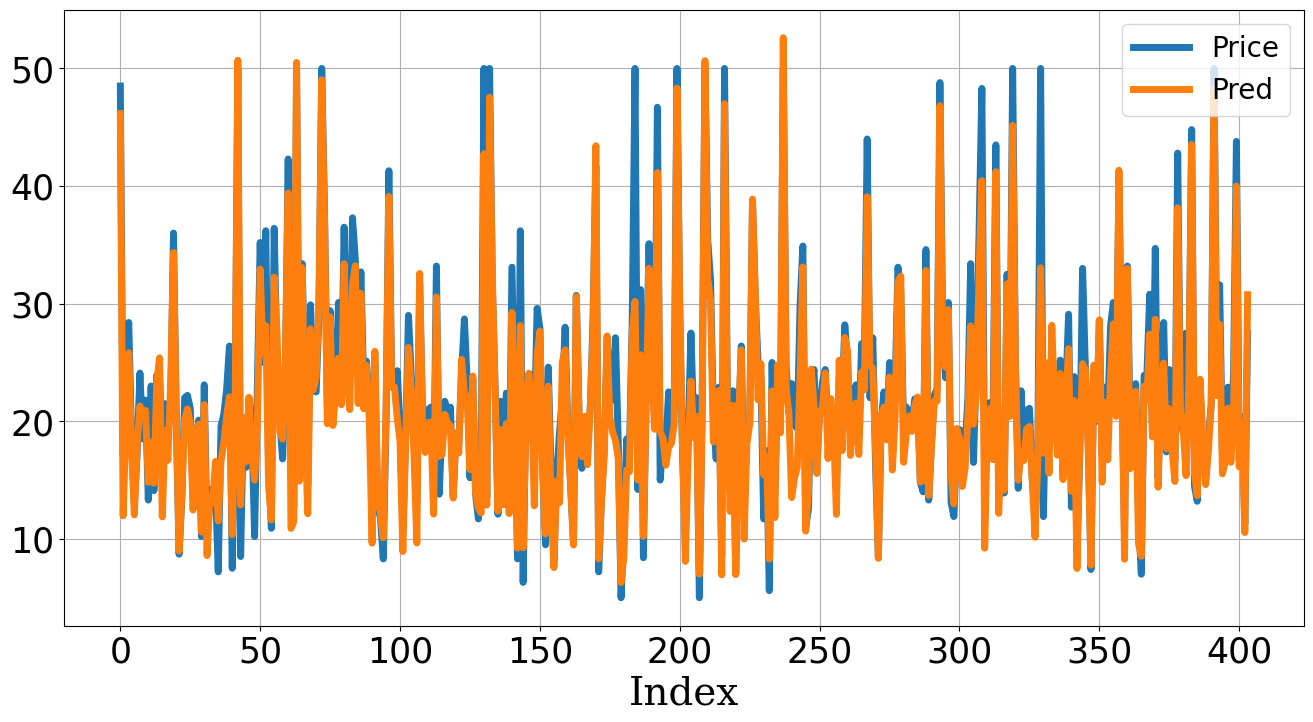

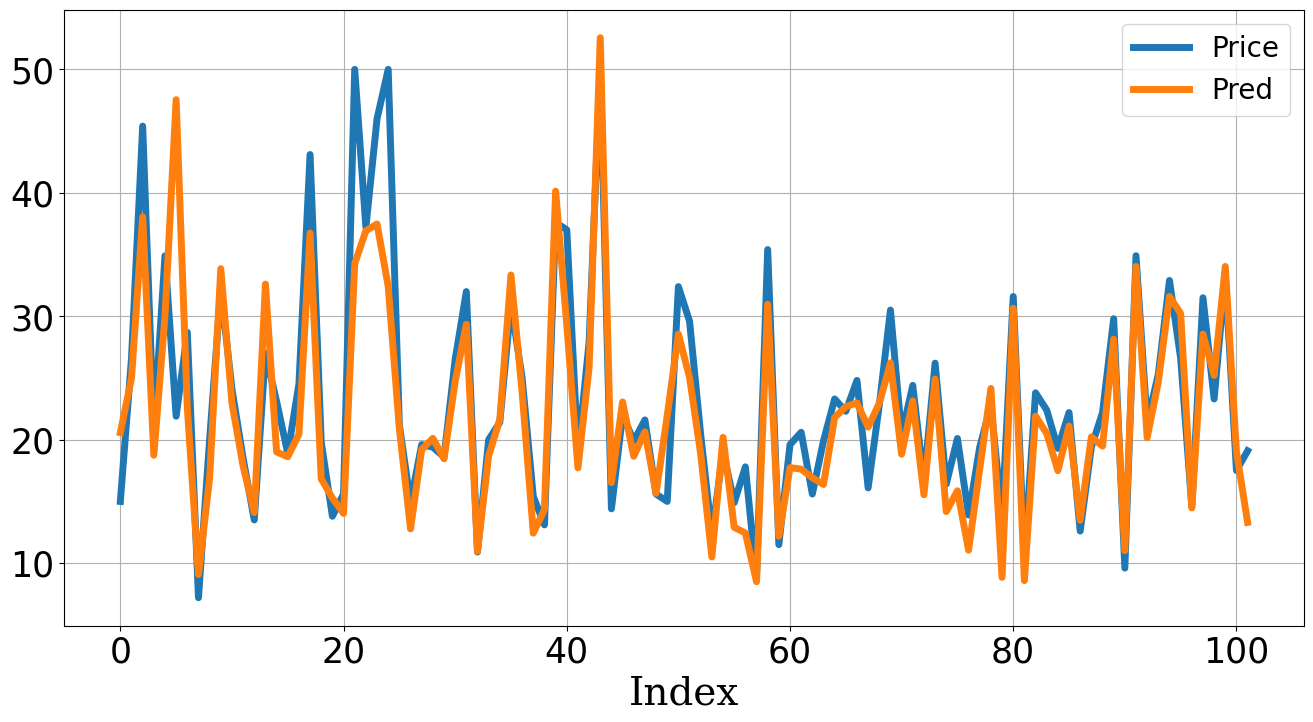

MAE   MSE  MAPE
Train 1.96  8.12  0.10
Test  2.80 20.38  0.12

In [12]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
CALLBACK = [callbacks.EarlyStopping(monitor='loss', mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

### Best Model Saving

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_28 (Dense)            (None, 256)               4864      
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)

Training:   0%|                                                                                               …

Epoch 398: early stopping


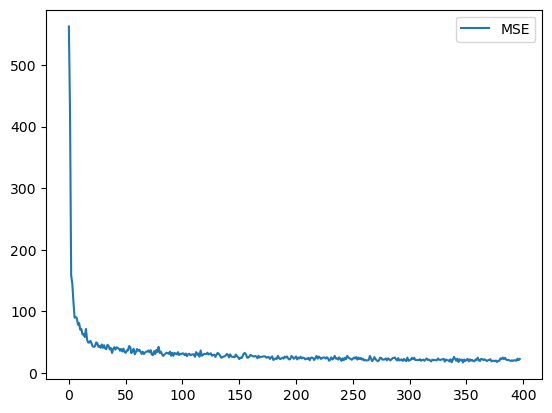

4/4 [==============================] - 0s 2ms/step


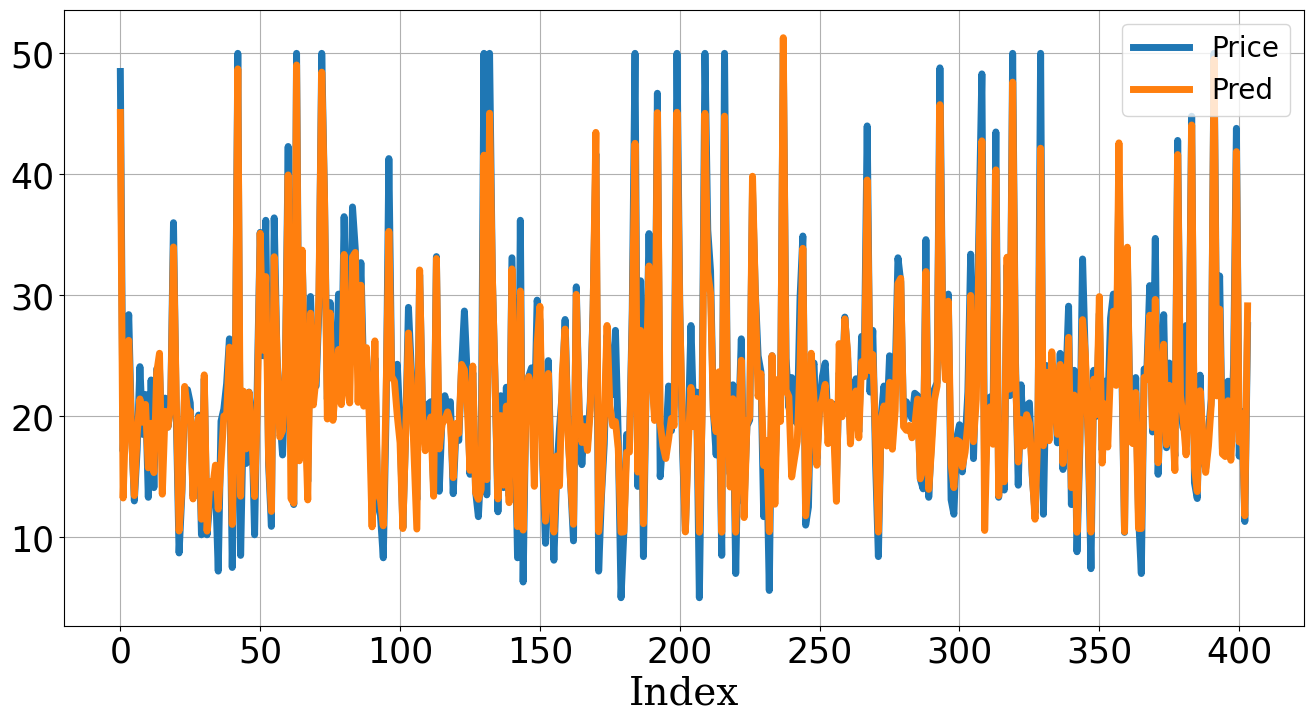

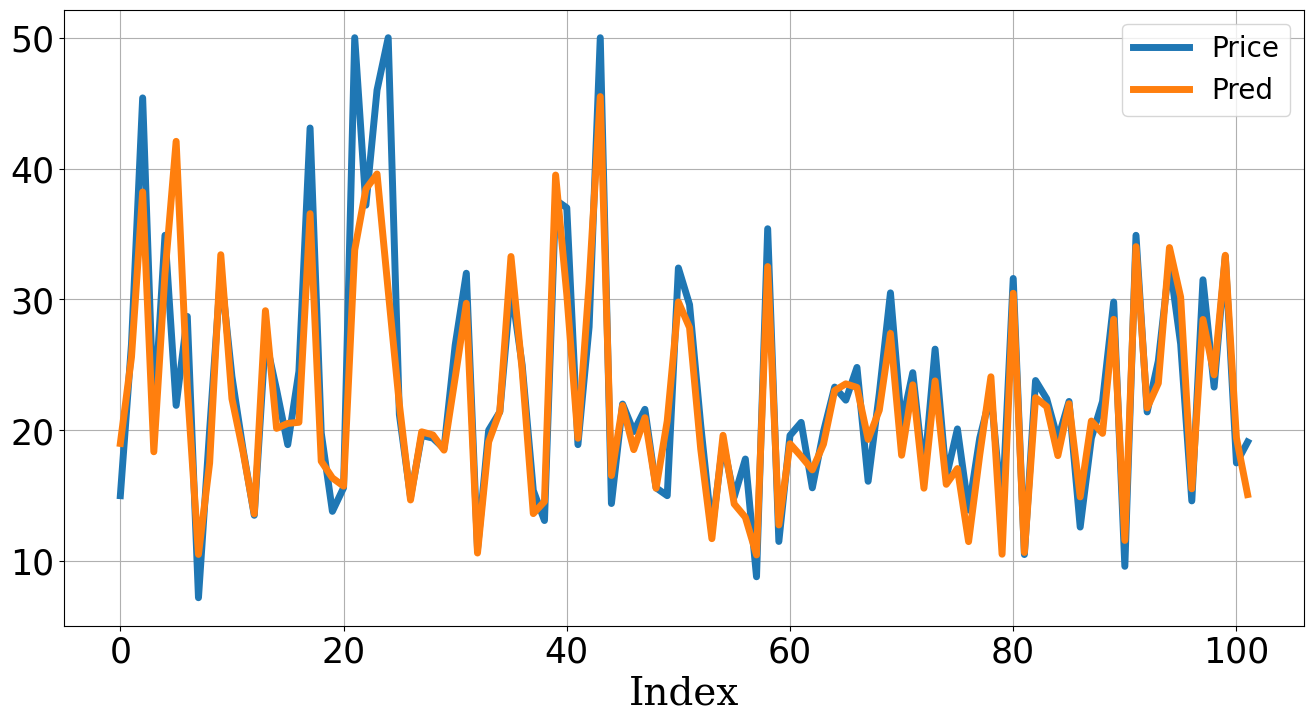

MAE   MSE  MAPE
Train 1.70  5.35  0.09
Test  2.38 16.12  0.10

In [13]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
MONITOR = 'loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

### Best Model Loading and Prediction

4/4 [==============================] - 0s 6ms/step


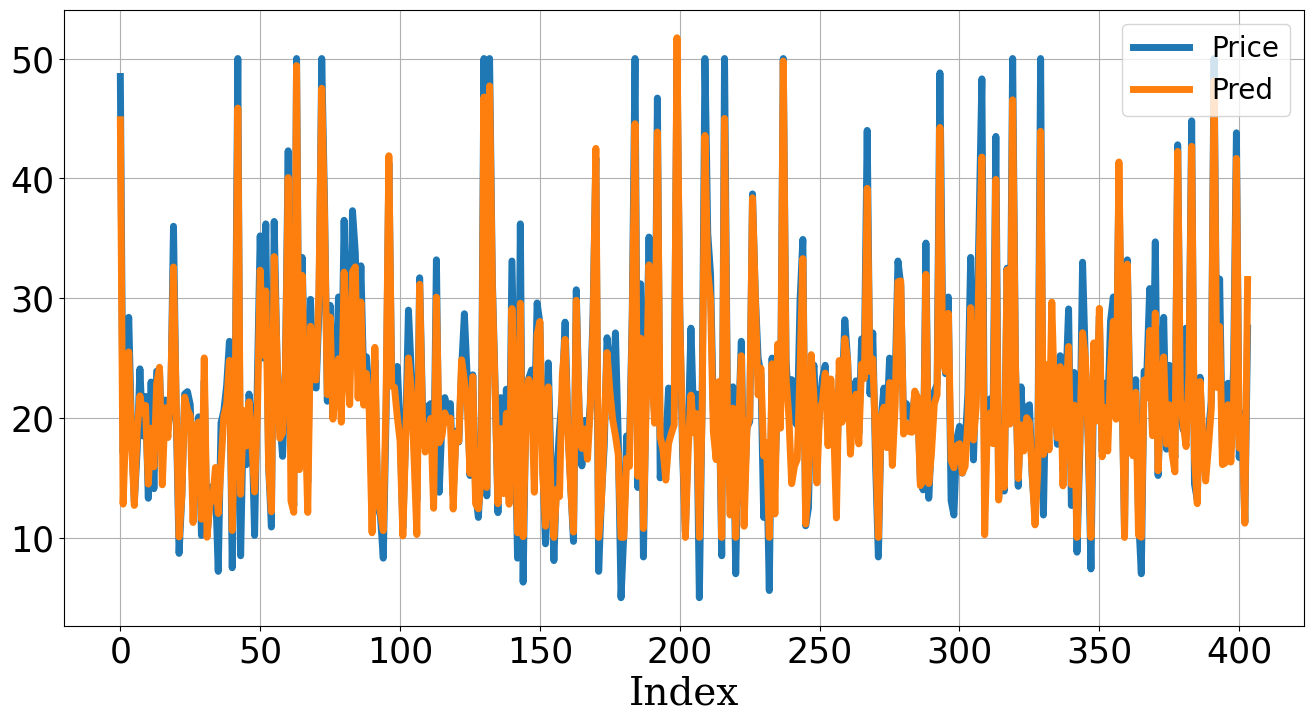

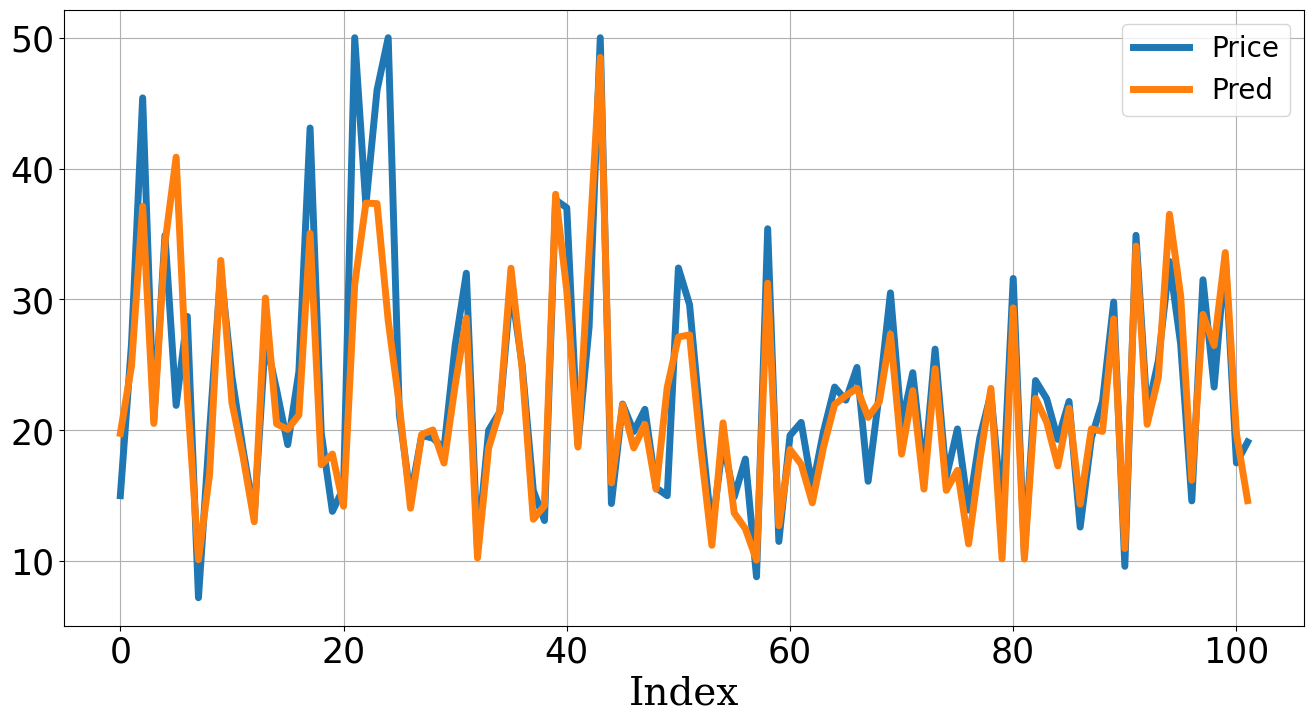

MAE   MSE  MAPE
Train 1.85  5.89  0.10
Test  2.68 19.68  0.11

In [14]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

### Test Validation

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_33 (Dense)            (None, 256)               4864      
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)

Training:   0%|                                                                                               …

Epoch 246: early stopping


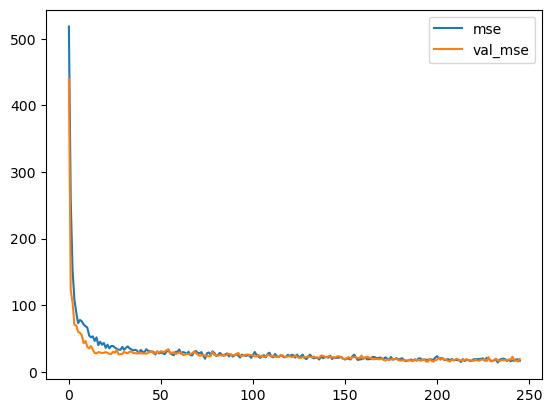

4/4 [==============================] - 0s 4ms/step


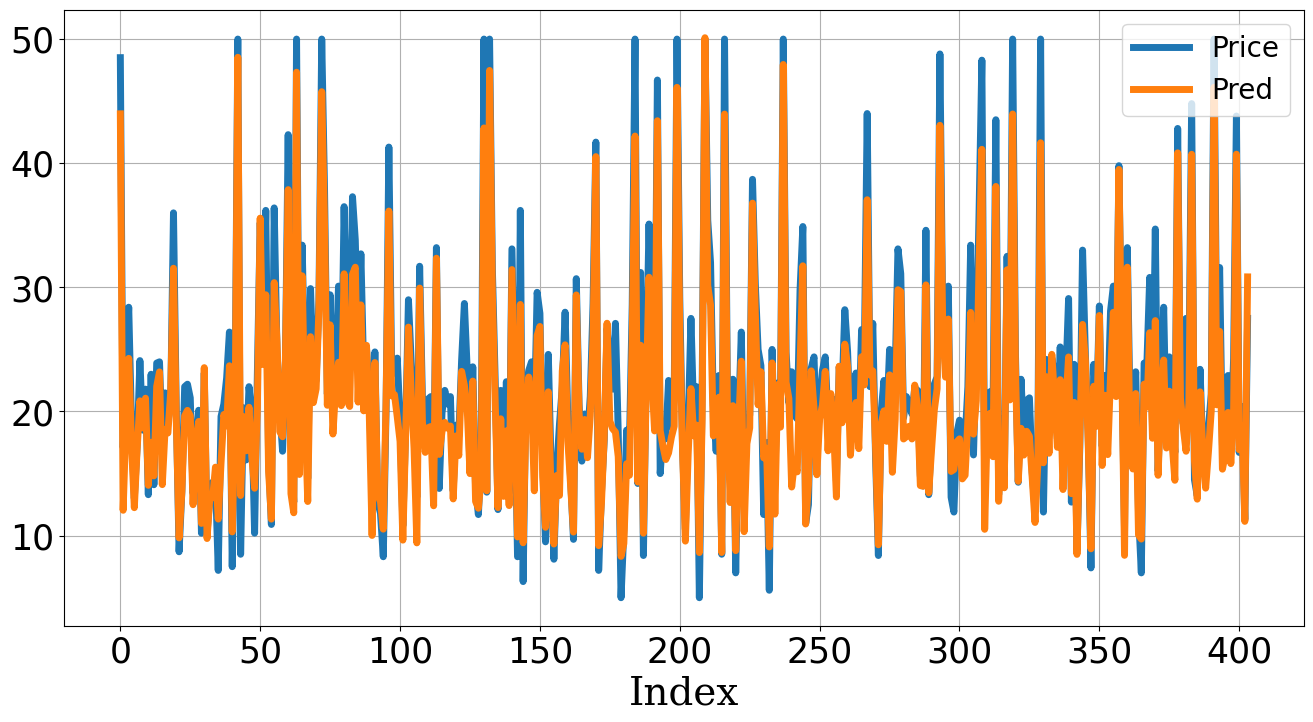

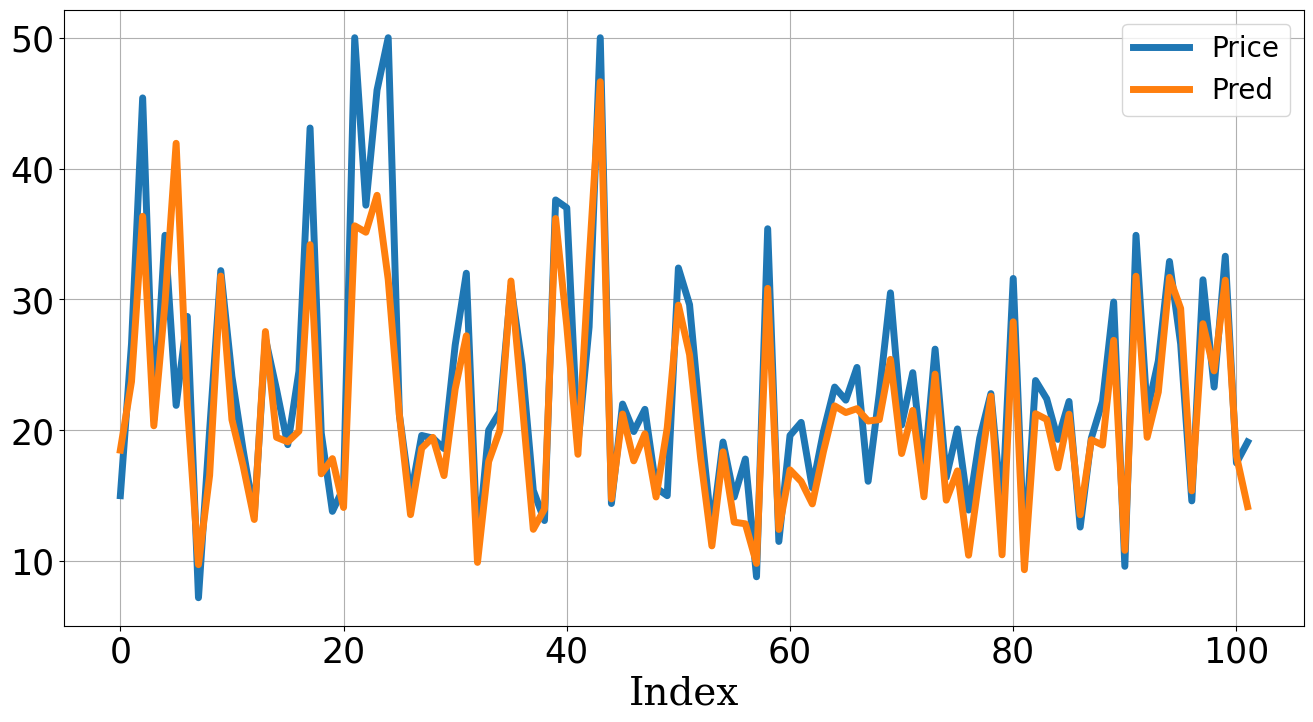

MAE   MSE  MAPE
Train 2.27  8.25  0.11
Test  2.97 19.12  0.13

In [15]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      validation_data=(X_test_fes, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

4/4 [==============================] - 0s 5ms/step


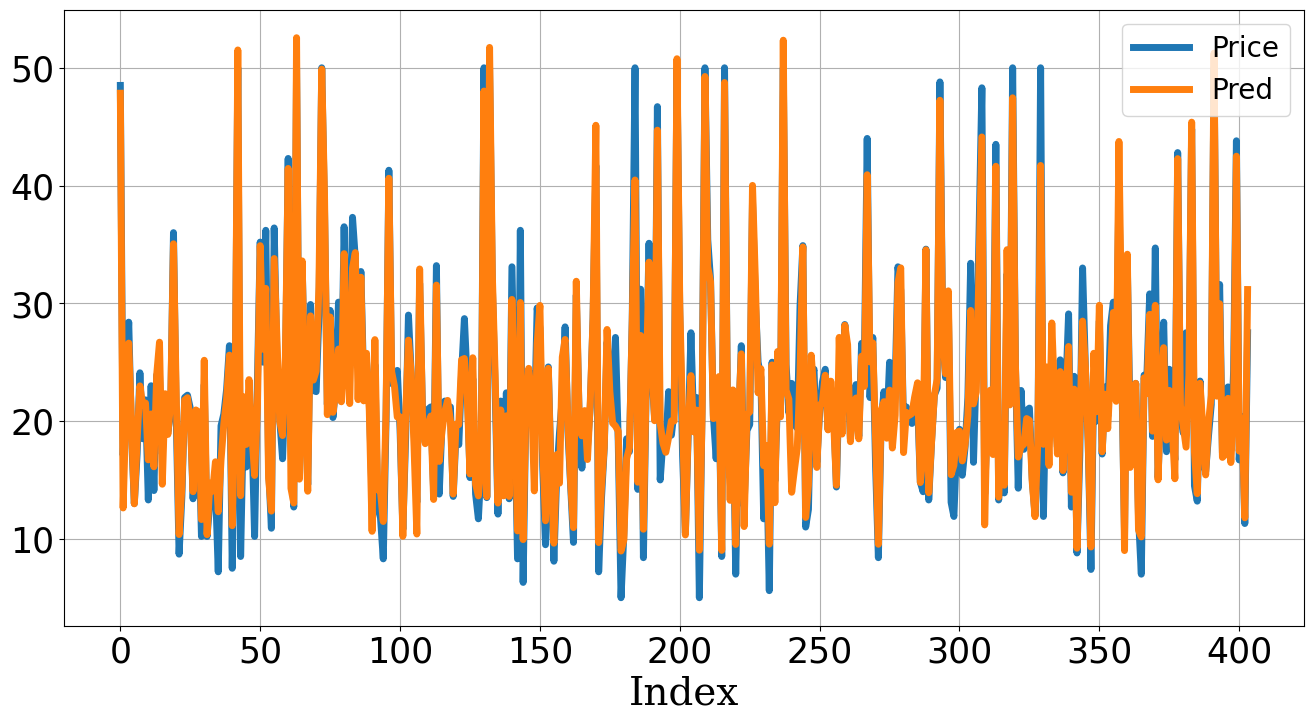

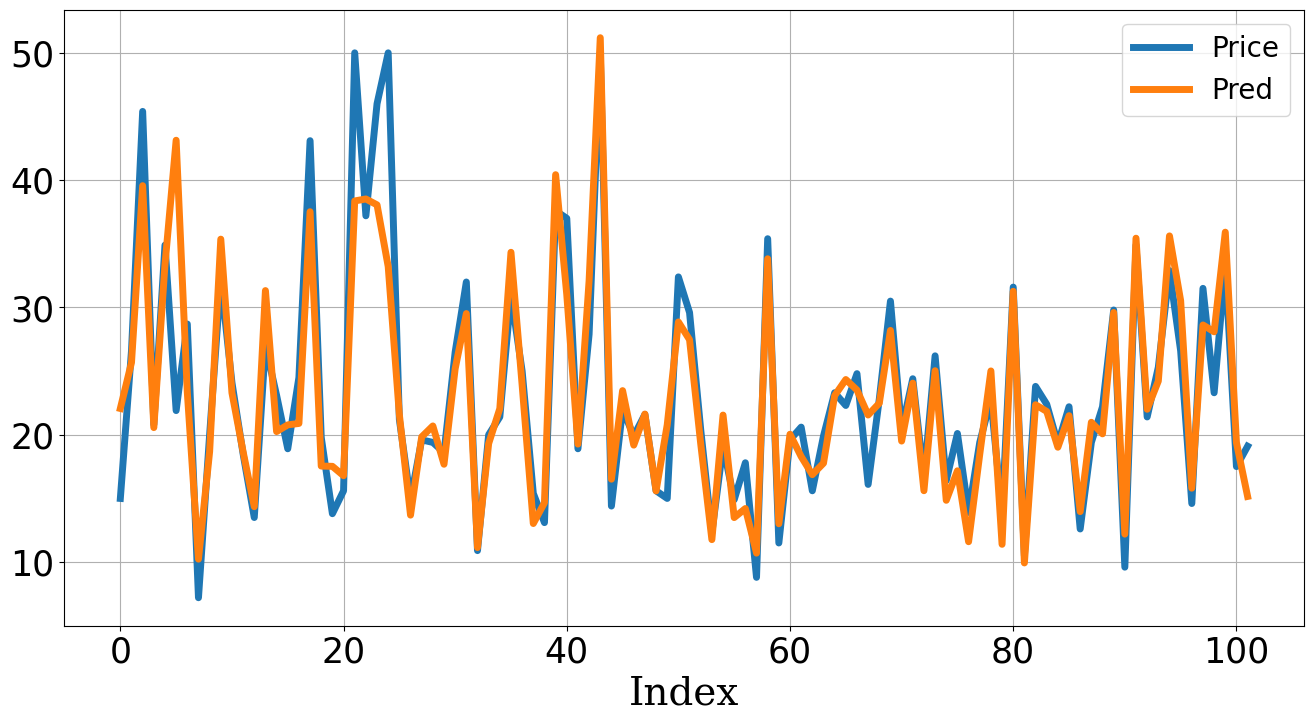

MAE   MSE  MAPE
Train 1.61  4.89  0.09
Test  2.43 15.07  0.11

In [16]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

## Wide and Deep Architecture

> **"Wide & deep은 `2016년 구글`이 발표한 논문으로, `Memorization과 Generalization을 동시에` 수행할 수 있는 `추천시스템 모델`이며 `구글 플레이스토어`의 추천시스템에 활용되어 매우 효율적이며 효과적인 성능"**

<center><img src='Image/Expert/WideDeep.PNG' width='1000'>(Chen et al., 2016 Wide & deep learning for recommender systems. CoRR, abs/1606.07792, 2016.)</center>

### Simple Version

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 dense_38 (Dense)               (None, 256)          4864        ['input_9[0][0]']                
                                                                                                  
 dropout_20 (Dropout)           (None, 256)          0           ['dense_38[0][0]']               
                                                                                                  
 dense_39 (Dense)               (None, 128)          32896       ['dropout_20[0][0]']             
                                                      

Training:   0%|                                                                                               …

Epoch 280: early stopping


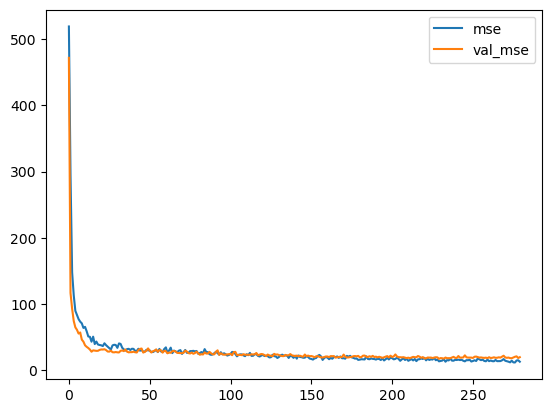

4/4 [==============================] - 0s 2ms/step


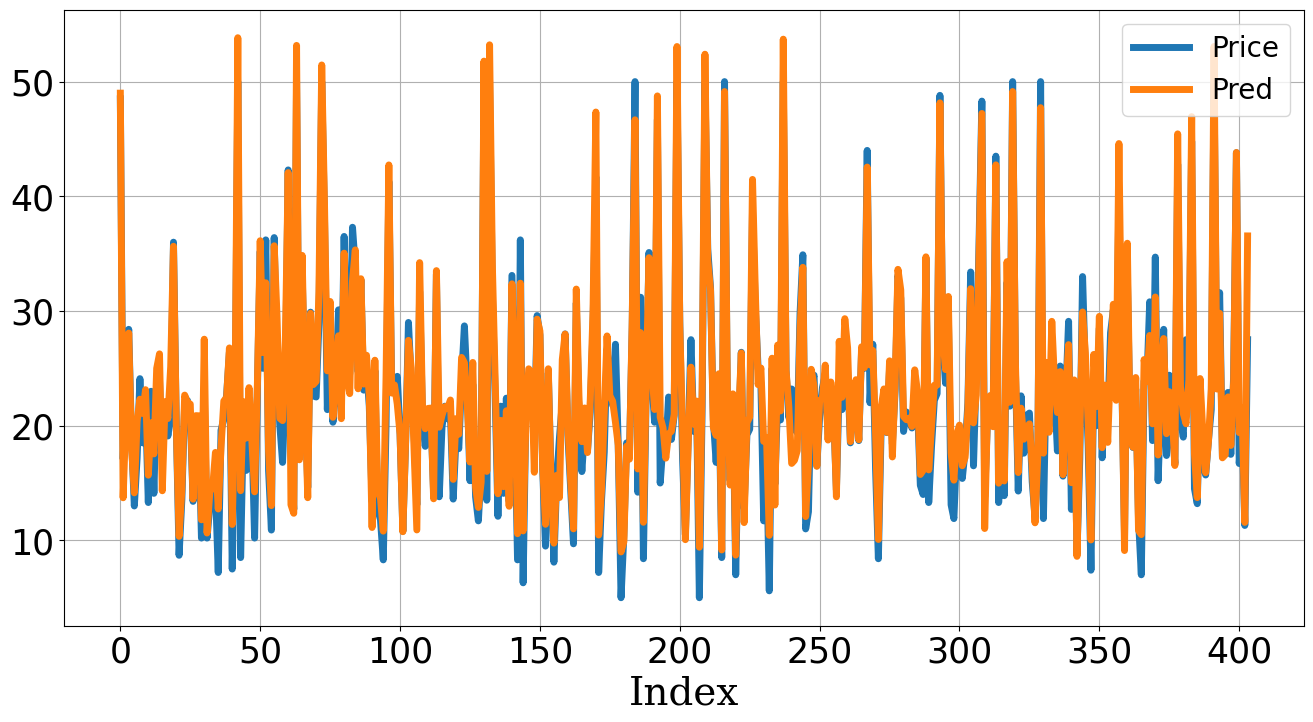

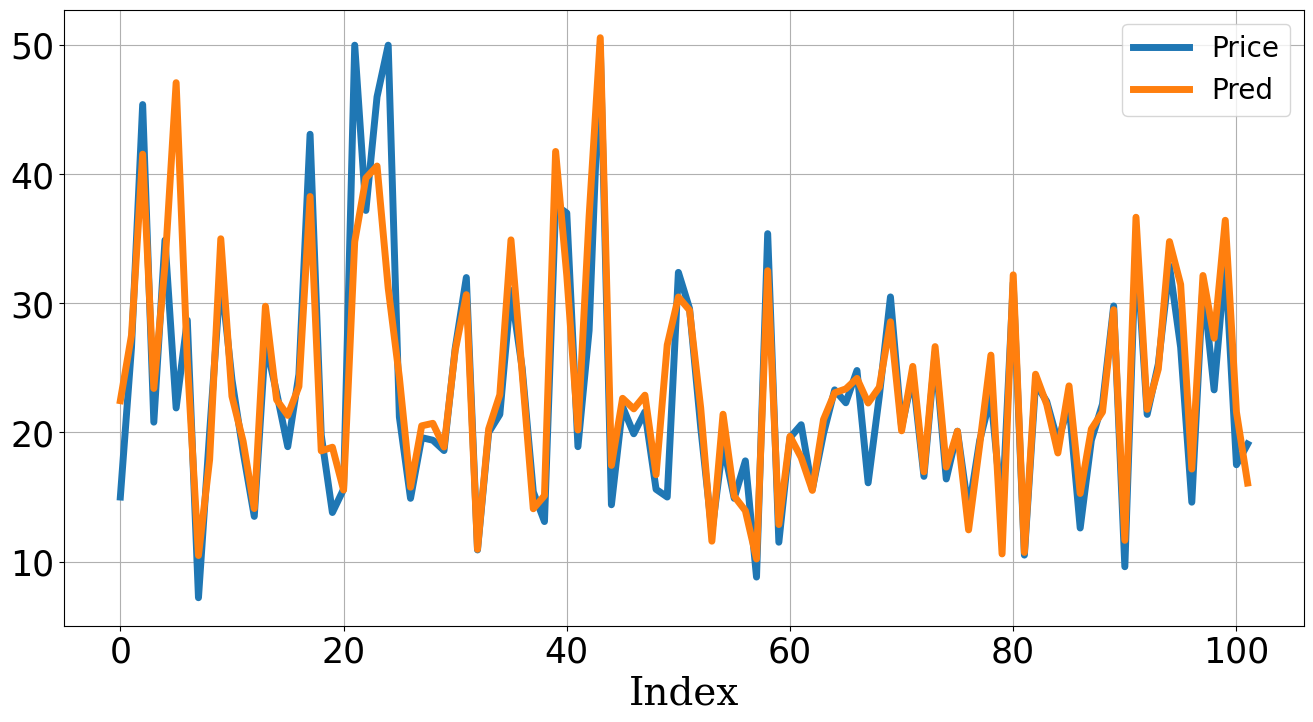

MAE   MSE  MAPE
Train 1.63  4.66  0.09
Test  2.47 19.34  0.11

In [17]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_WideDeep.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = concatenate([inputs, hiddens])
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      validation_data=(X_test_fes, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

4/4 [==============================] - 0s 8ms/step


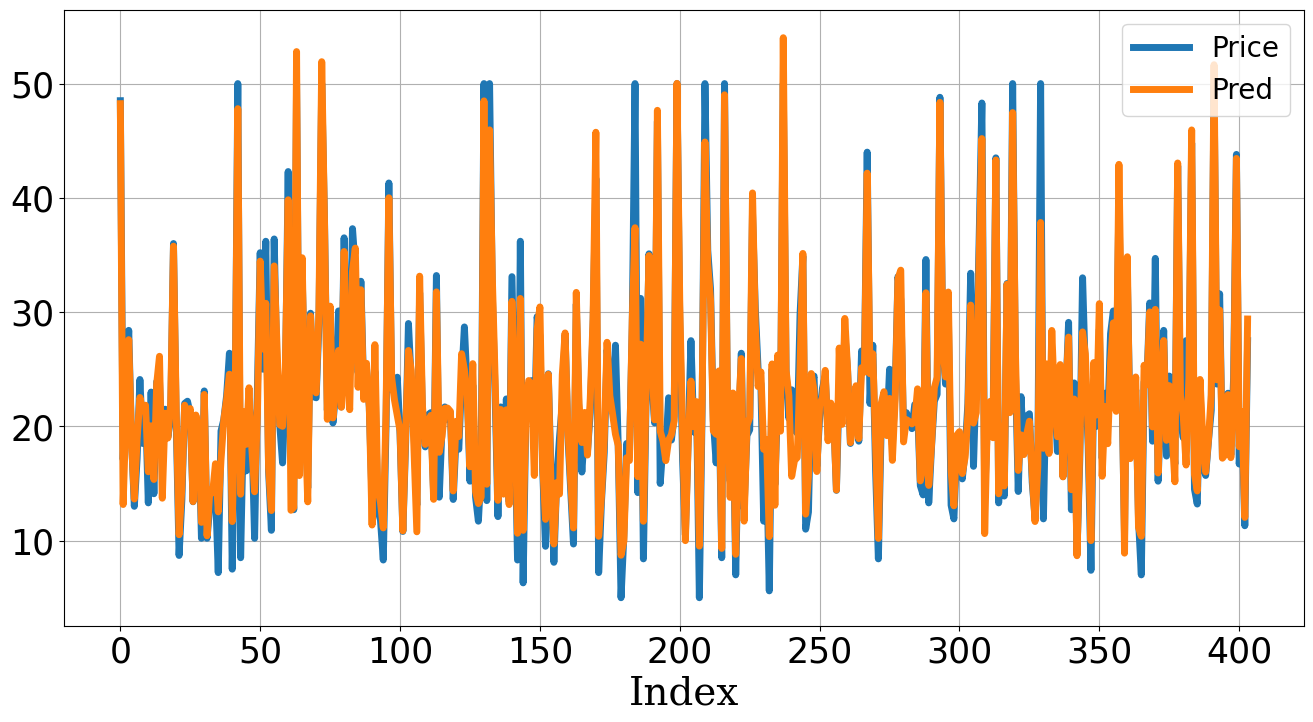

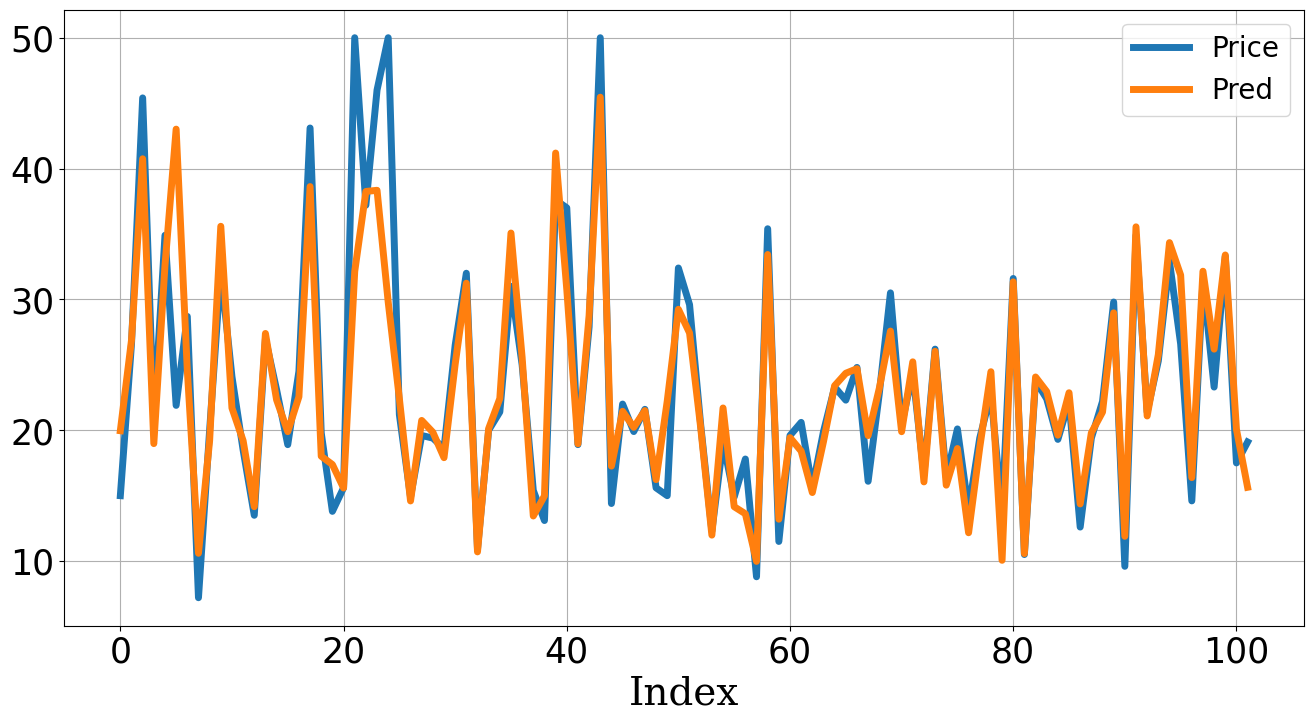

MAE   MSE  MAPE
Train 1.59  5.02  0.09
Test  2.20 16.84  0.10

In [18]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

### Customized Version

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 18)]         0           []                               
                                                                                                  
 dense_43 (Dense)               (None, 256)          4864        ['input_11[0][0]']               
                                                                                                  
 dropout_24 (Dropout)           (None, 256)          0           ['dense_43[0][0]']               
                                                                                                  
 dense_44 (Dense)               (None, 128)          32896       ['dropout_24[0][0]']             
                                                      

Training:   0%|                                                                                               …

Epoch 271: early stopping


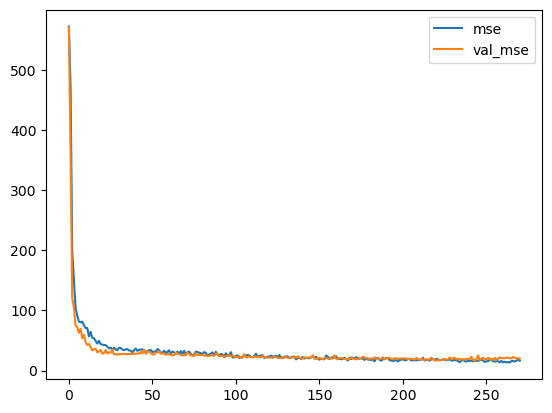

4/4 [==============================] - 0s 2ms/step


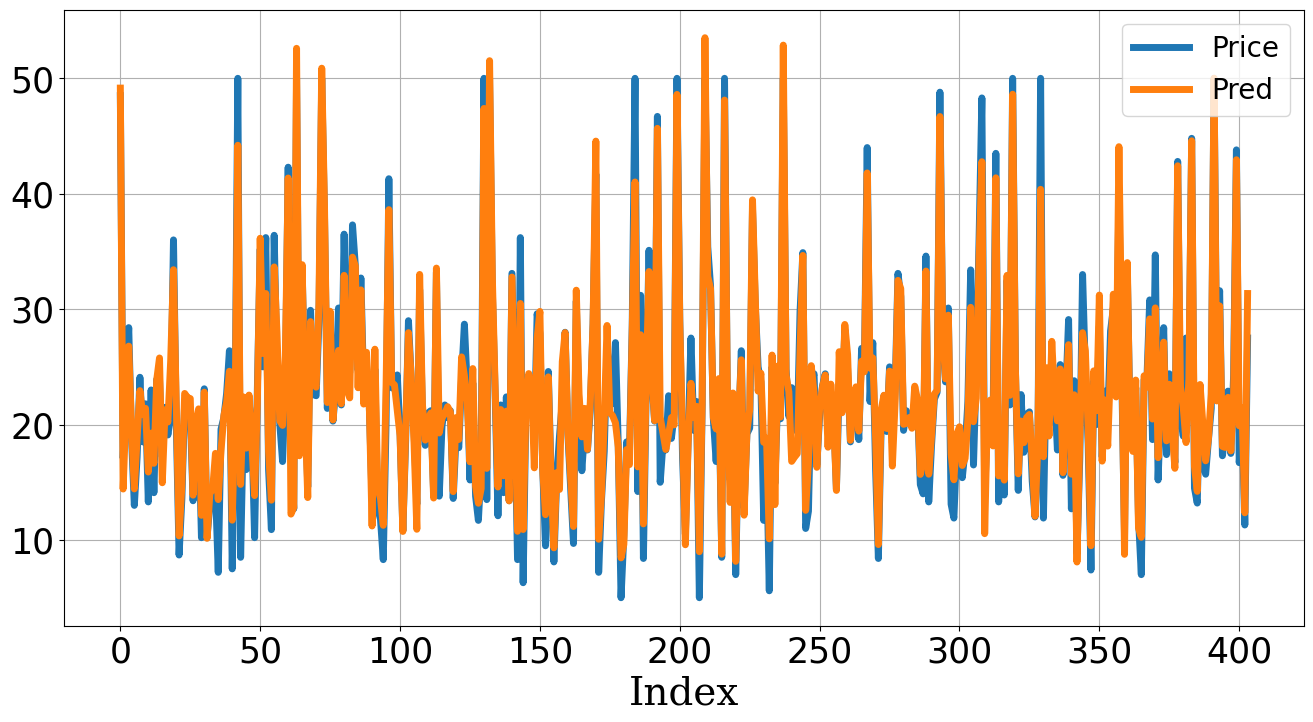

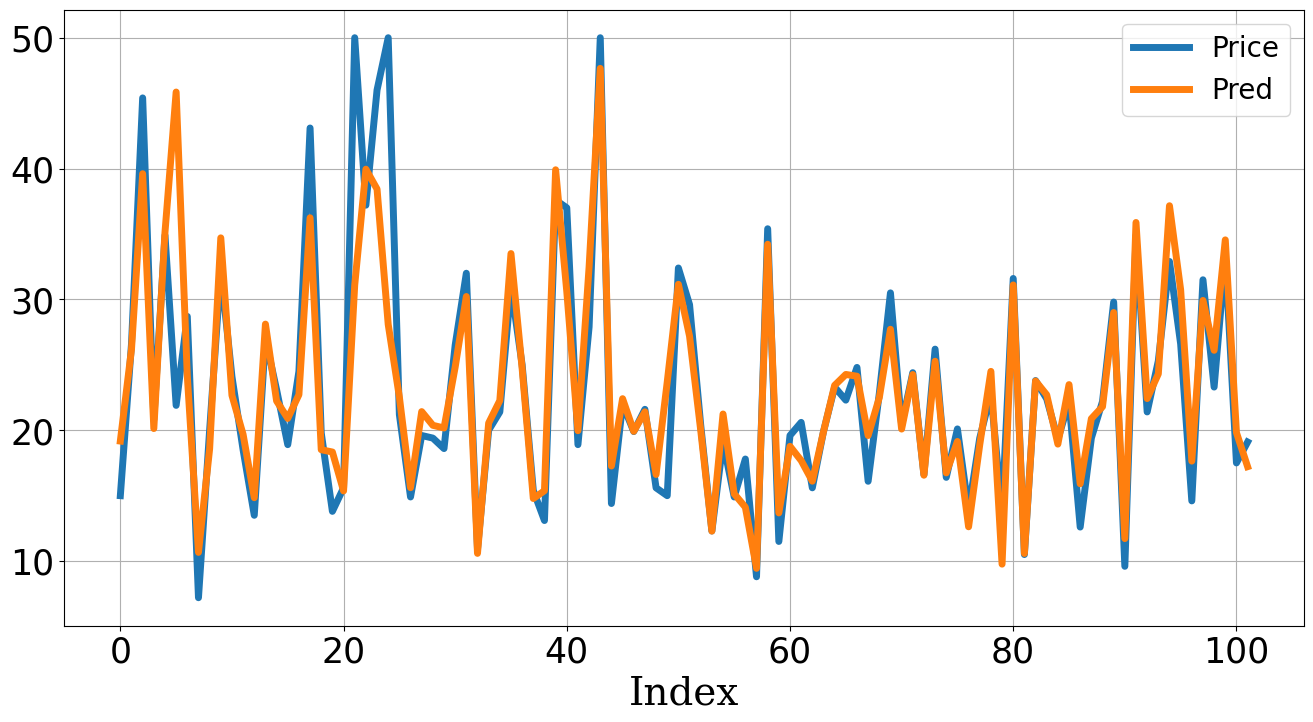

MAE   MSE  MAPE
Train 1.61  4.84  0.09
Test  2.36 19.78  0.10

In [19]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_WideDeep.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
###
INPUT_WIDE = X_train_fes.shape[1]
INPUT_DEEP = X_train_fes.shape[1]
X_trainW, X_trainD = X_train_fes.iloc[:,:INPUT_WIDE], X_train_fes.iloc[:,:INPUT_DEEP]
X_testW, X_testD = X_test_fes.iloc[:,:INPUT_WIDE], X_test_fes.iloc[:,:INPUT_DEEP]
X_train_fes = (X_trainW, X_trainD)
X_test_fes = (X_testW, X_testD)
###

inputW = Input(shape=(INPUT_WIDE,))
inputD = Input(shape=(INPUT_DEEP,))
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputD)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = concatenate([inputW, hiddens])
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model([inputW, inputD], output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      validation_data=(X_test_fes, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

4/4 [==============================] - 0s 2ms/step


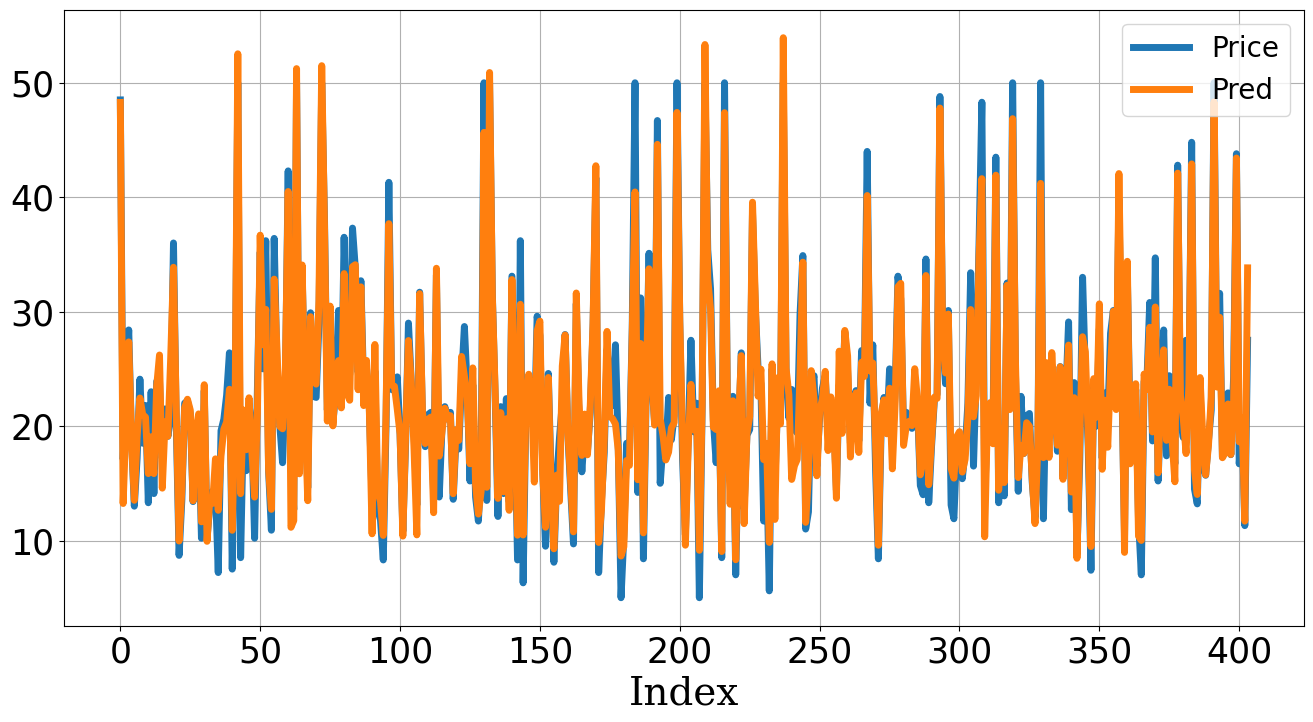

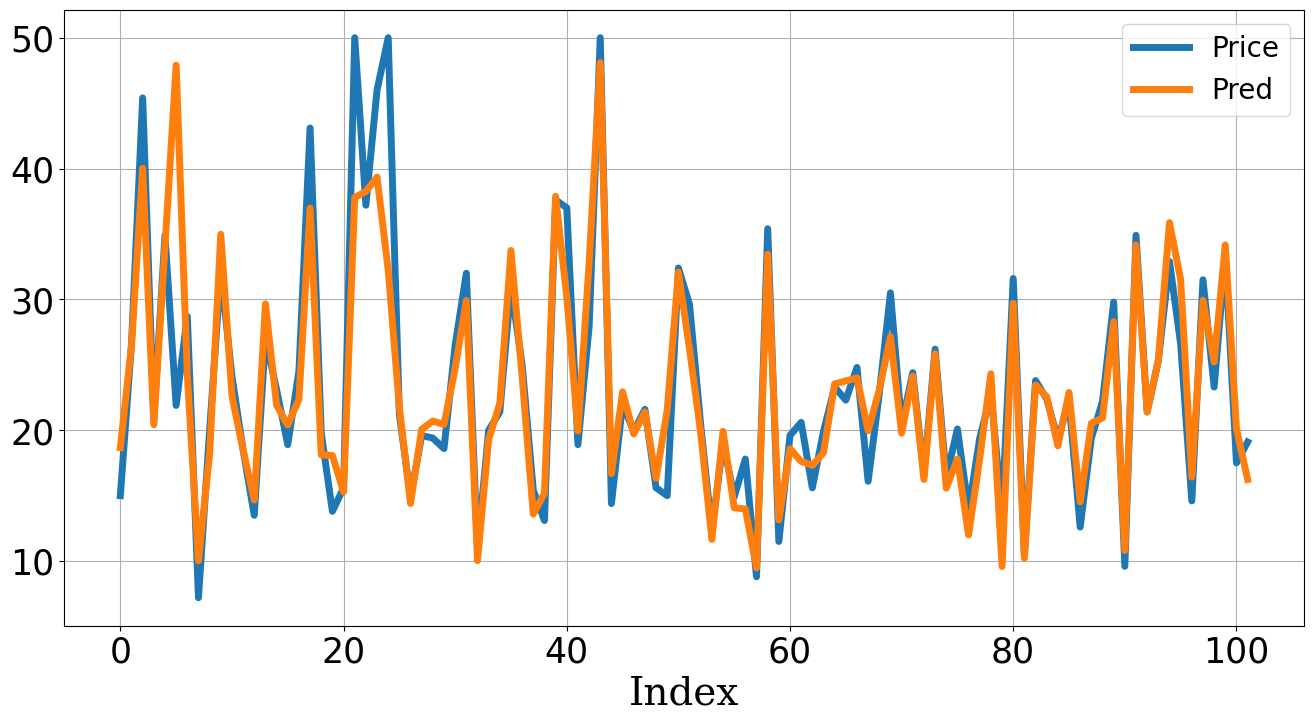

MAE   MSE  MAPE
Train 1.61  4.95  0.09
Test  2.25 16.54  0.10

In [20]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

# **Classification Problem:** 타이타닉 생존자 예측

|     **변수**     |                           **설명**                          |
|:------------:|:-------------------------------------------------------:|
| **PassengerId**  |                        승객 번호                        |
|   **Survived**   |                 생존여부(1:생존, 0:사망)                |
|    **Pclass**    |           승선권 클래스(1:1st, 2:2nd, 3:3rd)            |
|     **Name**     |                        승객 이름                        |
|     **Sex**      |                        승객 성별                        |
|     **Age**      |                        승객 나이                        |
|    **SibSp**     |                동반한 형제자매, 배우자 수               |
|    **Patch**     |                   동반한 부모, 자식 수                  |
|    **Ticket**    |                     티켓의 고유 넘버                    |
|     **Fare**     |                       티켓의 요금                       |
|    **Cabin**     |                        객실 번호                        |
|   **Embarked**   | 승선한 항구명(C:Cherbourg, Q:Queenstown, S:Southampton) |

## Logistic Regression

**1-1) 알고리즘 함수세팅:** 분류문제를 푸는 대표적인 알고리즘 `Logistic Regression`

- `범주형 종속변수`의 적합/추정하기 위한 `변환과정` 필요
- `Logistic/Sigmoid Function`를 사용하여 `곡선(S-curve) 형태로 변환`

<center><img src='Image/Expert/Linear_Logistic.png' width='600'></center>

> **(1) 회귀분석 추정:**
>
>\begin{align*}
Y \approx \hat{Y} &= f(X_1, X_2, ..., X_k) \\
&= w_0 + w_1X_1 + w_2X_2 + \cdots + w_kX_k \\
&= XW
\end{align*}
>
> **(2) 시그모이드 변환(Logistic/Sigmoid Transformation):** `Binary Classification` 반영하는 `곡선 형태`로 변경
>
>\begin{align*}
Pr(\hat{Y}) &= \dfrac{1}{1+exp(-\hat{Y})} \\ 
&= \dfrac{1}{1+exp(-XW)} \\
&= \dfrac{exp(XW)}{1+exp(XW)}
\end{align*}
>
> **(3) 로짓 변환(Logit Transformation):** `X`의 선형관계 형태로 변환하여 `변수들`로 `Y=1`인 확률 추정
>
>\begin{align*}
Pr(\hat{Y}) \left( 1 + exp(XW) \right) &= exp(XW) \\
Pr(\hat{Y}) &= \left( 1 - Pr(\hat{Y}) \right) exp(XW) \\
\text{Odds(ratio):} \left( \dfrac{Pr(\hat{Y})}{1 - Pr(\hat{Y})} \right) &= exp(XW) \\
\text{Logit(log-odds): } log \left( \dfrac{Pr(\hat{Y})}{1 - Pr(\hat{Y})} \right) &= XW = w_0 + w_1X_1 + w_2X_2 + \cdots + w_kX_k \\
\end{align*}

---

**1-2) 추정 결과 해석:**

> **(1) 해석 방향:** $\hat{Logit}$과 $\hat{Odds}$ `변환`으로 가능
> $$
\begin{align*}
\text{Logit: } log \left( \dfrac{Pr(Y)}{1 - Pr(Y)} \right) &= X\hat{W} = \hat{w}_0 + \hat{w}_1X_1 + \hat{w}_2X_2 + \cdots + \hat{w}_kX_k \\
\text{Odds: } \left( \dfrac{Pr(Y)}{1 - Pr(Y)} \right) &= exp(X\hat{W}) = exp(\hat{w}_0 + \hat{w}_1X_1 + \hat{w}_2X_2 + \cdots + \hat{w}_kX_k) \\
\end{align*}
$$
>
> **(2) 회귀분석과 달리 `Y`의 로짓변환 값을 `X`의 선형관계로 추정하기 때문에, 해석시 `Odds`로 변환해서 해석해야 하므로 `주의`**
>
> \begin{align*}
\left( \dfrac{Pr(Y)}{1 - Pr(Y)} \right) = exp(0.01 + 0.8 X_1)
\end{align*}
>
> - **선형회귀분석:** $X_1$이 1만큼 증가하면 $Y$는 $w_1$만큼 증가
>
>> : $X_1$이 `1`만큼 증가하면 $Y$는 `0.8`만큼 증가
>
> - **로지스틱회귀분석:** $X_1$이 1만큼 증가하면 $\left( \dfrac{Pr(\hat{Y})}{1 - Pr(\hat{Y})} \right)$ 범주변화는 $exp(w_1)$만큼 증가
>
>> : $X_1$이 `1`만큼 증가하면 암에 걸리지 않을 확률보다 암에 걸릴 확률이 $exp(0.8)$ = `2.23`배 더 높음
>
> **(3) Y 확률 예측:** `추정된 계수`의 함수를 `로지스틱 변환`으로 출력
>
> \begin{align*}
Pr(\hat{Y}) &= \dfrac{1}{1+exp(-X\hat{W})} = \dfrac{exp(X\hat{W})}{1+exp(X\hat{W})}
\end{align*}
>
> **(4) 분류 의사결정:** 기본 임계값은 `0.5`로 Y 확률 예측 값이 `0.5 이상이면 1`, `0.5 미만이면 0`으로 분류
>
> \begin{align*}
\hat{Y} = \begin{cases} 1 ~~~~ \text{if } ~~~ Pr(\hat{Y}) >= 0.5 \\ 0 ~~~~ \text{if } ~~~ Pr(\hat{Y}) < 0.5 \end{cases}
\end{align*}

---

**2) 함수 추정을 위한 비용함수:** 나의 주장 기반 알고리즘의 `분류값`($Pr(\hat{Y})$)과 `실제 데이터`($Y$)의 차이를 평가하는 함수

- **이슈: `잔차`를 사용하는 Linear Regression 비용함수 적용 어려움**    

> (1) 분류문제에서는 $\hat{Y}$를 사용한 `잔차(에러)계산이 무의미`   
>
> (2) 잔차($Y - \hat{Y}$)를 `시그모이드 및 로짓 변환`을 하면 Non-convex 형태가 되서 `최소값(Global Minimum) 추정 어려움`    
>
> (3) 정확한 `수학적 방정식 기반` 계수추정 어렵기에 `확률론적 접근 필요`    
>
> <center><img src='Image/Expert/Cost_Comparison.png' width='600'></center>

- **방향:** 회귀문제와 달리 `새로운 비용함수`가 필요

> - Y를 `잘` 분류하면 `cost=0`으로 그렇지 않으면 cost=$\infty$가 되는 방향
>> - (빨간선) 실제값이 `1`일때 예측값이 `1`이면 Cost는 `0`
>> - (빨간선) 실제값이 `1`일때 예측값이 `0`이면 Cost는 `무한대`
>
> \begin{align*}
\text{Cost} = \begin{cases} -log(Pr(\hat{Y})) ~~~~ & \text{in the case of } ~~~ Y = 1 \\ -log(1-Pr(\hat{Y})) ~~~~ & \text{in the case of } ~~~ Y = 0 \end{cases}
\end{align*}
> <center><img src='Image/Expert/Cost_Logistic.png' width='600'></center>

- **Cross Entropy 등장:** Y가 0과 1인 경우의 `Cost를 결합`하여 하나의 식으로 표현

> - 로지스틱 알고리즘은 `비용함수`로 `Cross Entropy`를 사용하고 `최소로 하는 계수/가중치 추정`
> - `Y=0`인 경우 `파란부분`만 남고 `Y=1`인 경우 `빨간부분`만 남아 `Class별`로 독립적으로 작동
> - 분류문제의 `Cost 함수는 다양`하고 많지만 통계학적으로 `Cross Entropy`는 계수 추정에 `효율적`인 편
> - `Convex 형태`이기 때문에 `Global Minimum`을 찾기가 용이함
> - 추정된 계수/가중치($\hat{w}$)로 방정식을 만들어 Y=1인 `분류확률` 계산 가능
>
>\begin{align*}
\text{Cost} &= \sum_{i=1}^{m} \left[ - \color{red}{\hat{Y}_{i} log (Pr(\hat{Y}_{i}))} - \color{blue}{(1-\hat{Y}_{i}) log (1-Pr(\hat{Y}_{i}))} \right] \\
\hat{W} &= \underset{W}{\arg\min} \sum_{i=1}^{m} \left[\text{Cost} \right] \\
\end{align*}


(712, 11) (712, 1)
(179, 11) (179, 1)
Effect of X..


features  coef  odds
0          const  2.62 13.70
1    PassengerId  0.17  1.18
2         Pclass -1.61  0.20
3            Sex -1.40  0.25
4            Age -1.26  0.29
5          SibSp -1.87  0.15
6          Parch -0.88  0.42
7         Ticket  0.47  1.61
8           Fare  0.73  2.07
9          Cabin -0.35  0.70
10       Name_Mr -1.15  0.32
11      Name_Mrs  0.67  1.95
12    Name_Noble -0.22  0.80
13  Name_Officer  1.34  3.81
14   Name_Priest -1.02  0.36
15    Embarked_Q  0.06  1.06
16    Embarked_S -0.22  0.80

Confusion Matrix: Test


Pred 0  Pred 1
True 0      99      15
True 1      14      51

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.87      0.87       114
     class 1       0.77      0.78      0.78        65

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Test


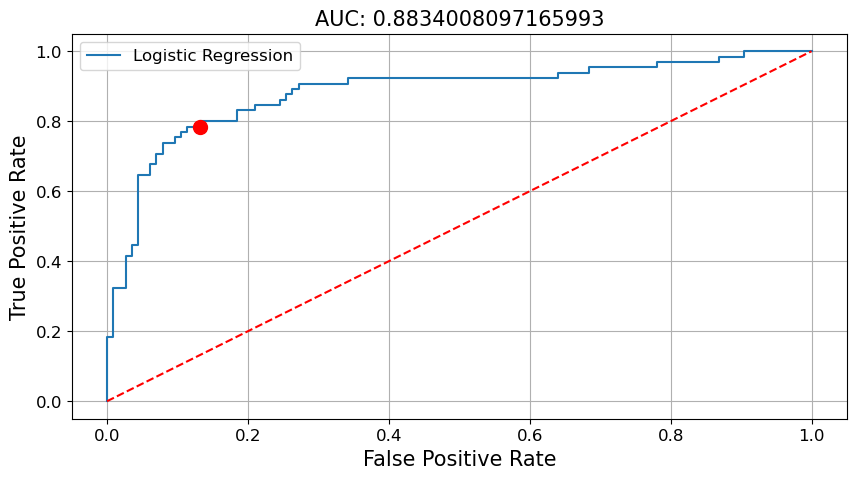

Accuracy  AUC
Train      0.83 0.81
Test       0.84 0.83

In [21]:
# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_logitreg = LogisticRegression(fit_intercept=False)
model_logitreg.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': model_logitreg.coef_[0],
                      'odds': np.exp(model_logitreg.coef_[0])}))

# 예측
Y_trpred = model_logitreg.predict(X_train_fes)
Y_tepred = model_logitreg.predict(X_test_fes)
P_trpred = model_logitreg.predict_proba(X_train_fes)
P_tepred = model_logitreg.predict_proba(X_test_fes)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
display(evaluation_class_ConfusionMatrix(Y_test, Y_tepred))

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_logitreg = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_logitreg

## Random Forest (Bagging)

**"데이터를 `복원샘플링`하여 나눈 샘플들로 `같은 알고리즘`으로 학습 후 `보팅` 방식으로 최종 예측"**

<center><img src='Image/Expert/Ensemble_Bagging.jpg' width='400'></center> 

(712, 11) (712, 1)
(179, 11) (179, 1)
변수 중요도: 


Importance
PassengerId         0.18
Pclass              0.06
Sex                 0.11
Age                 0.08
SibSp               0.05
Parch               0.03
Ticket              0.05
Fare                0.16
Cabin               0.06
Name_Mr             0.15
Name_Mrs            0.03
Name_Noble          0.00
Name_Officer        0.01
Name_Priest         0.01
Embarked_Q          0.01
Embarked_S          0.02

Confusion Matrix: Test


Pred 0  Pred 1
True 0      98      16
True 1      15      50

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.87      0.86      0.86       114
     class 1       0.76      0.77      0.76        65

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

ROC Curve: Test


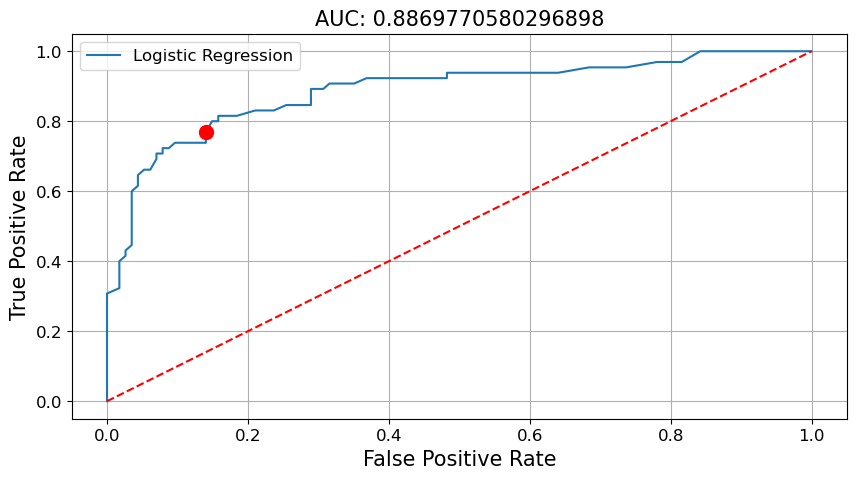

Accuracy  AUC
Train      1.00 1.00
Test       0.83 0.81

In [22]:
# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=123)
model_rf.fit(X_train_fes, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_rf.feature_importances_, 
                     index=model_rf.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_rf.predict(X_train_fes)
Y_tepred = model_rf.predict(X_test_fes)
P_trpred = model_rf.predict_proba(X_train_fes)
P_tepred = model_rf.predict_proba(X_test_fes)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
display(evaluation_class_ConfusionMatrix(Y_test, Y_tepred))

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_rf = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_rf

## Stacking

> **"`개별 알고리즘`을 서로 `결합하여 예측`"**

---

- 배깅 또는 부스팅과 유사하지만, 가장 큰 차이는 `개별 알고리즘`으로 `예측한 데이터`를 학습하여 `다시 예측`
- 개별 알고리즘의 예측 데이터를 `메타 데이터`라고 지칭하는 편
- 메타 데이터를 `별도의 알고리즘`으로 `최종 학습` 후 `최종 예측`하며 이때의 알고리즘을 `메타 알고리즘`라고 지칭하는 편
- 스태킹 모델링 시, `2종류 알고리즘` 필요

> (1) 개별적인 모델링에 사용할 `개별 알고리즘`
>
> (2) 개별 기반 예측 데이터를 학습하고 예측하는데 필요한 `메타 알고리즘`

<center><img src='Image/Expert/Stacking_Structure.png' width='500'>(http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/)</center> 

- `캐글과 같은 대회`에서 높은 순위를 차지하기 위해 성능 수치를 높여야 할 경우 자주 사용됨
- 일반적으로 `성능이 비슷한 모델을 결합`해서 좀더 나은 `성능 향상`을 도출
- 2~3개의 개별 모델만을 결합해서 쉽게 예측 성능을 향상시킬 수 없음
- 스태킹을 적용한다고 해서 반드시 성능 향상 된다는 보장 없음
- `과적합` 단점을 개선하기 위해 다양한 `CV(Cross Validation)` 방식을 사용한, 다양한 `CV기반 Stacking` 알고리즘 존재


(712, 11) (712, 1)
(179, 11) (179, 1)
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.86      0.87       114
     class 1       0.76      0.78      0.77        65

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC Curve: Test


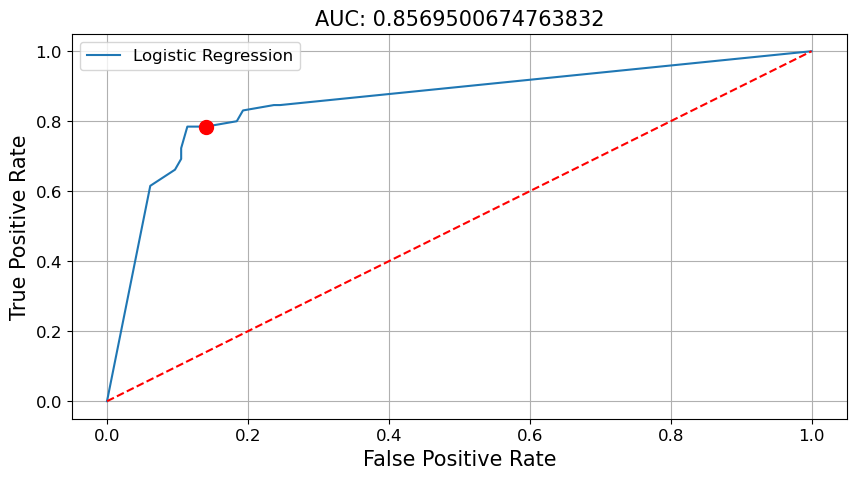

Accuracy  AUC
Train      1.00 1.00
Test       0.83 0.82

In [23]:
# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Stacking
## Weak Learners
model_knn = KNeighborsClassifier()
model_svm = SVC()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier(eval_metric='mlogloss')

model_logitreg = LogisticRegression()
clf = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingClassifier(classifiers=clf, 
                                 meta_classifier=model_logitreg)
model_stack.fit(X_train_fes, Y_train)

# 예측
Y_trpred = model_stack.predict(X_train_fes)
Y_tepred = model_stack.predict(X_test_fes)
P_trpred = model_stack.predict_proba(X_train_fes)
P_tepred = model_stack.predict_proba(X_test_fes)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## 성능검증
Score_stack = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_stack

## Multi-Layered Perceptron

**1) 방향:** 인공신경망의 `비선형성 접근 필요성`으로  `은닉층`을 반영항 `다층/심층신경망으로 딥러닝을 출발시킴`

- `2개의 직선` 또는 `여러개의 직선이 결합된 1개의 곡선`을 이용하여 제대로 분류가 가능할 것이라 가정
- `다층(여러개의 직선)신경망`으로 비선형 문제를 해결 (Hinton, 1986)  

<center><img src='Image/Expert/DL_Compare_MLP.jpg' width='500'></center>

- 여러문제가 해결되면서 `은닉층을 늘려 학습 결과를 향상`시키는 방법이 등장하며 `DNN(Deep Neural Network)`라고 함

<center><img src='Image/Expert/DL_ANN_MLP.bmp' width='600'>(https://4ir.kisti.re.kr/)</center>

- 은닉층의 수가 증가하면 더욱 어려운 문제를 풀수 있는데, 통상 `은닉층을 최소 2개이상 가진 알고리즘`을 `딥러닝(Deep Learning)` 알고리즘 이라고 함

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

**2) 한계:** 층(Layer)의 수가 많아지면서 `늘어나는 Weights를 수동으로 학습하기에 한계`가 있기에 여전히 데이터 학습 불가

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_48 (Dense)            (None, 128)               2176      
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________


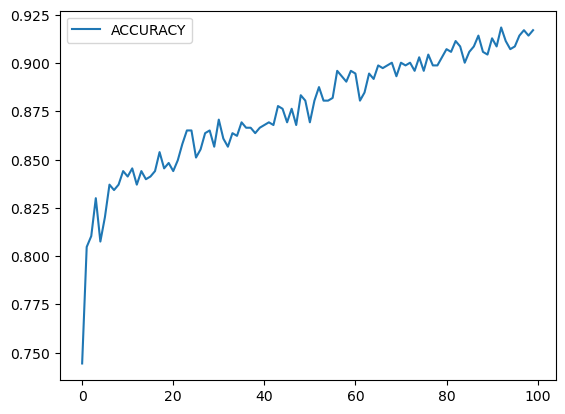

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.84      0.81      0.83       114
     class 1       0.69      0.74      0.71        65

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

ROC Curve: Test


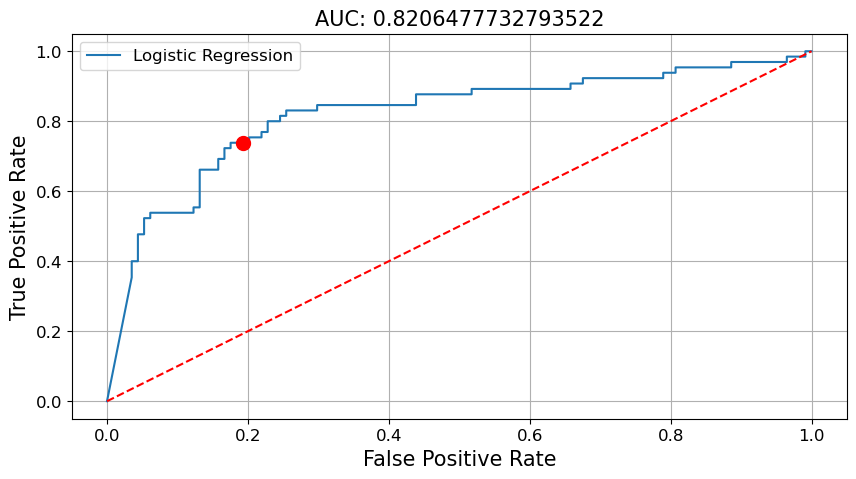

Accuracy  AUC
Train      0.93 0.91
Test       0.78 0.77

In [24]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

## Comparison of Modeling Codes

```python
# Logistic Regression
model_logitreg = LogisticRegression(fit_intercept=False)
model_logitreg.fit(X_train_fes, Y_train)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=123)
model_rf.fit(X_train_fes, Y_train)

# Stacking
model_knn = KNeighborsClassifier()
model_svm = SVC()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier(eval_metric='mlogloss')

model_logitreg = LogisticRegression()
clf = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingClassifier(classifiers=clf, 
                                 meta_classifier=model_logitreg)
model_stack.fit(X_train_fes, Y_train)

# MLP
## same as regression problem!
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  

model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
```


# **Performance Update**

> - **하이퍼파라미터 튜닝:** 실행마다 결과는 달라질 수 있고 `비용함수를 수동으로 최소로 만드는 것`
> - **인공지능 개발:** 하이퍼파라미터 튜닝으로 `낮은 비용함수와 높은 예측성능`을 획득 하는 것


## Increasing Hidden Layers

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_51 (Dense)            (None, 256)               4352      
                                                                 
 dense_52 (Dense)            (None, 128)               32896     
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 1)                 33        
                                                                 
Total params: 47,617

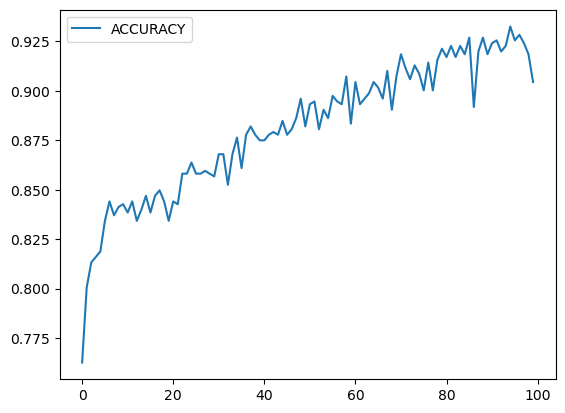

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.85      0.83      0.84       114
     class 1       0.72      0.74      0.73        65

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.80      0.80       179

ROC Curve: Test


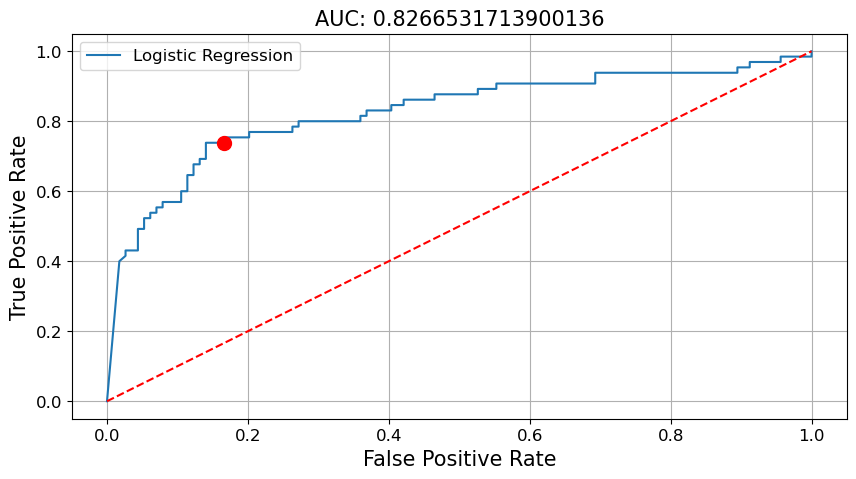

Accuracy  AUC
Train      0.93 0.92
Test       0.80 0.79

In [25]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

## Regularization

> **"`추정 가중치가 커지면` 활성함수를 통해 `기울기가 급변`하게되어 비용함수 최소화가 어렵고 `과적합 높아짐`"**   
>
> **(0) Linear Regression:** `MSE`를 비용함수로 사용
>
> <center> $\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2\Biggr]$ </center>
>
> **(1) L1 Panelty:** `LASSO Regression`에 사용한 비용함수 반영    
>
> \begin{align*}
\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k \left|w_i \right|\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}
>
> - `중요도가 낮은 변수`의 가중치는 0으로 출력하여 과적합 방지
> - `변수선택 효과`가 있어 모델 복잡도를 효과적으로 제약
> - 샘플 수보다 변수가 많더라도 변수선택 효과 때문에 `고차원의 데이터도 적용가능`
> - `패널티의 정도`는 Hyperparameter로 사전 결정되며 교차검증이나 유사 방법으로 결정
> - `모델에 제약`을 주며 정확도를 상승시킴   
>
> **(2) L2 Panelty:** `Ridge Regression`에 사용한 비용함수 반영   
>
> \begin{align*}
\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k w_i^2\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}
>
> - `모든 가중치`를 일률적으로 `작게 만드는 경향`
> - `중요도 낮은 변수`라도 0이 아닌 가중치를 출력하므로 `일반화 및 변수비교 효과`
> - 일반화 및 패널티 효과를 높이기 위해 `L1 보다 L2를 많이 사용하는 경향`

<center><img src='Image/Expert/DL_CF_L1L2.png' width='600'></center>

<center><img src='Image/Expert/DL_CF_L1L2_Compare.png' width='600'></center>
<!-- (https://kevinthegrey.tistory.com/110) -->

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_56 (Dense)            (None, 256)               4352      
                                                                 
 dense_57 (Dense)            (None, 128)               32896     
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 32)                2080      
                                                                 
 dense_60 (Dense)            (None, 1)                 33        
                                                                 
Total params: 47,617

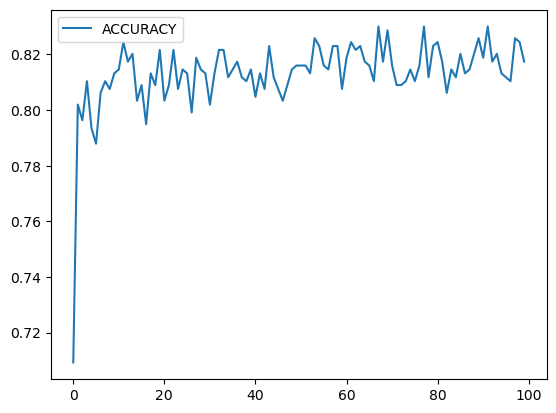

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.89      0.89       114
     class 1       0.81      0.78      0.80        65

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

ROC Curve: Test


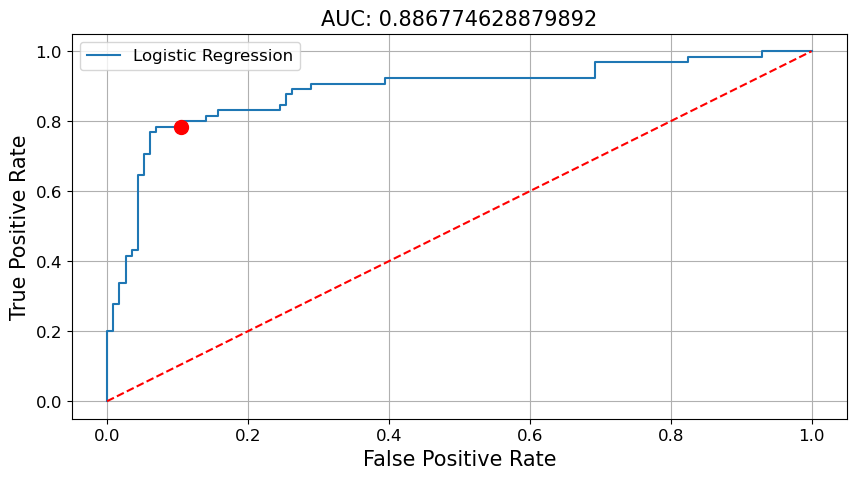

Accuracy  AUC
Train      0.83 0.81
Test       0.85 0.84

In [26]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = regularizers.l2(0.01)
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

## Drop Out

> **"`모든 직원`이 함께 일하는 것 < `소그룹`의 결과를 통합하는 것 $\rightarrow$ 더욱 효율적일수도"**    
>
> **"각 단계의 줄어든 뉴런은 약한 학습이지만 `약한 모델들이 합쳐져 강력한 예측력`"**   
>
> - `Labeled 데이터의 부족`과 `Overfitting 문제 해결`을 위해 Drop Out 제안 (Hinton et al. 2012)
> - 학습할 때마다 `일부 유닛만을 사용하고 이를 반복해서 합치는 방식`으로 `Ensemble과 유사`
> - 빠진 뉴런들로 예측 하기에 `여러개의 국소적 독립적 내부패턴 학습가능`
> - 네트워크가 `뉴런의 특정 가중치에 덜 민감해짐`
> - `더욱 일반화에 기여가 가능`하고 훈련 데이터에만 과적합 가능성 적어짐
> - 너무 낮은 비율은 효과가 적고 너무 높은 비율은 과소적합 하기에 `20~50% 권장`
> - 일반적으로 `Learning Rate(LR, 10->100)과 Momentum(0.9 or 0.99)을 높여 사용`
> - LR을 높여 가중치의 크기를 줄이면 Ridge와 유사하게 `과적합이 줄어 높은 성능`

<center><img src='Image/Expert/DL_DropOut.png' width='500'></center>
<!-- (https://t1.daumcdn.net/cfile/tistory/99324B335D383CBD1B) -->

> - 랜덤한 뉴런을 사용하는 것 대신, `연결선을 랜덤하게 사용하는 DropConnect 방법`도 존재 (Wan et al. 2013)

<center><img src='Image/Expert/DL_Dropout_Dropconnect.png' width='700'></center>

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_61 (Dense)            (None, 256)               4352      
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_62 (Dense)            (None, 128)               32896     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 dropout_30 (Dropout

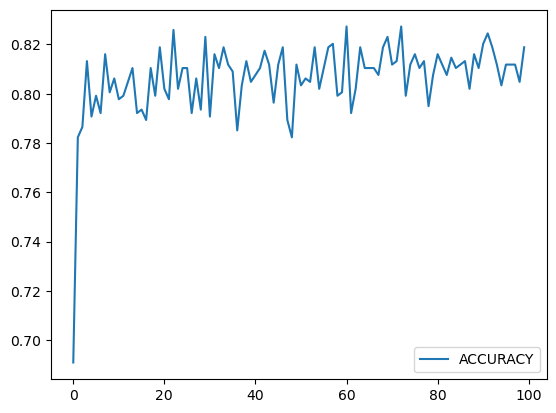

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.90      0.89       114
     class 1       0.82      0.78      0.80        65

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179

ROC Curve: Test


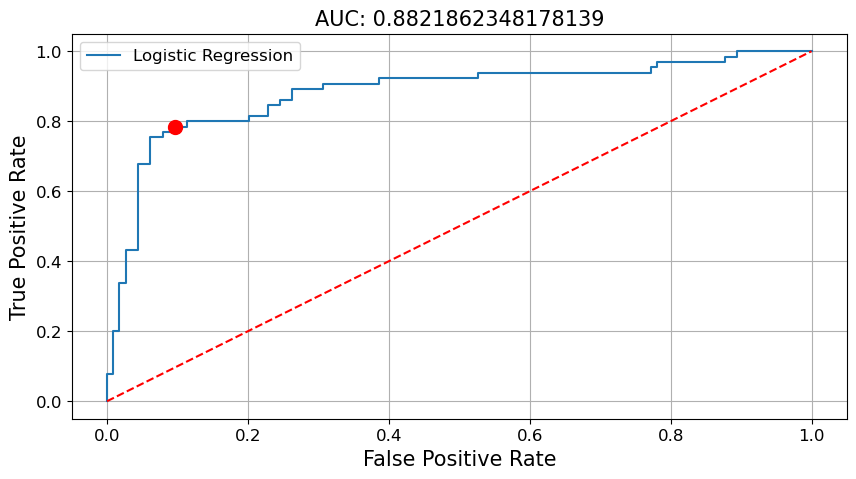

Accuracy  AUC
Train      0.83 0.81
Test       0.86 0.84

In [27]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

## Early Stopping

> **"데이터가 Train/Validation/Test로 구분되어 있을때, `Validation/Test의 비용함수가 낮으면 멈추므로 Train을 계속 학습하는 과적합 가능성 낮춤`"**   

<center><img src='Image/Expert/DL_Overfitting_Epoch.png' width='600'></center>

<center><img src='Image/Expert/DL_Overfitting_EarlyStopping.png' width='600'></center>
<!-- (https://kevinthegrey.tistory.com/110) -->

### Basic

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_66 (Dense)            (None, 256)               4352      
                                                                 
 dropout_32 (Dropout)        (None, 256)               0         
                                                                 
 dense_67 (Dense)            (None, 128)               32896     
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_68 (Dense)            (None, 64)                8256      
                                                                 
 dropout_34 (Dropout

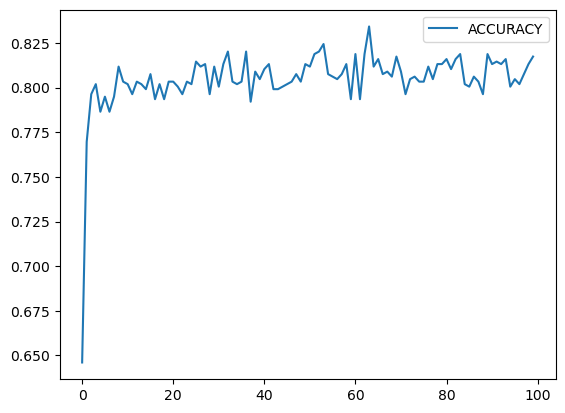

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.87      0.91      0.89       114
     class 1       0.83      0.77      0.80        65

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179

ROC Curve: Test


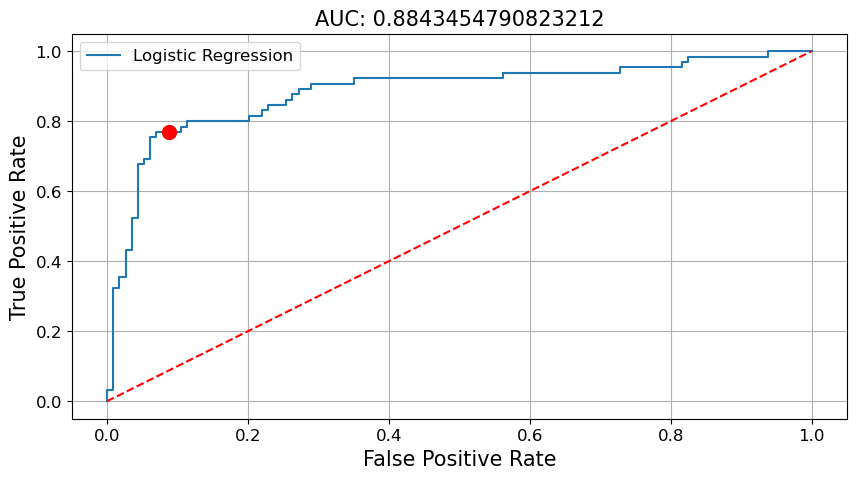

Accuracy  AUC
Train      0.83 0.80
Test       0.86 0.84

In [28]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
CALLBACK = [callbacks.EarlyStopping(monitor='loss', mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1)]
################

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

### Progress Bar

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_71 (Dense)            (None, 256)               4352      
                                                                 
 dropout_36 (Dropout)        (None, 256)               0         
                                                                 
 dense_72 (Dense)            (None, 128)               32896     
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dropout_38 (Dropout

Training:   0%|                                                                                               …

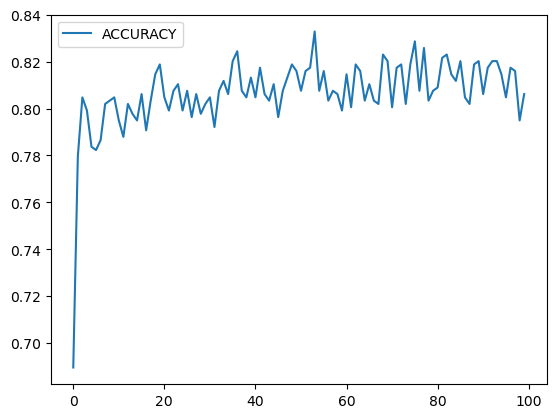

6/6 [==============================] - 0s 4ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.90      0.89       114
     class 1       0.82      0.78      0.80        65

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179

ROC Curve: Test


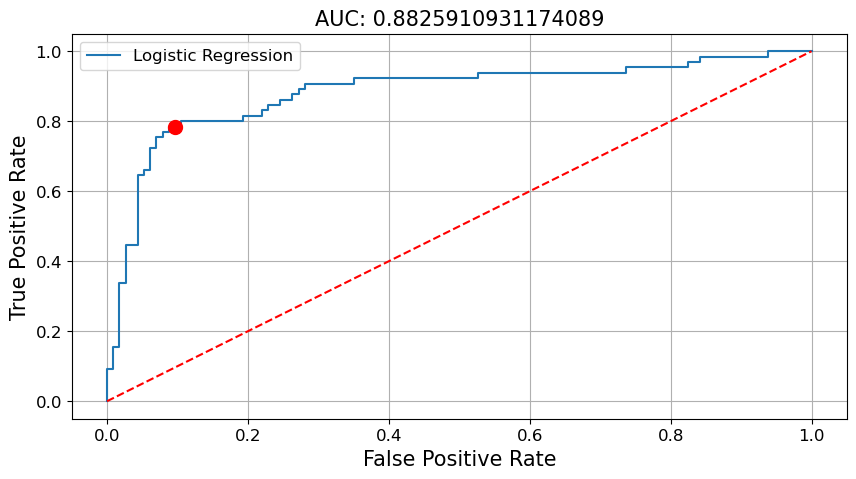

Accuracy  AUC
Train      0.84 0.82
Test       0.86 0.84

In [29]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
CALLBACK = [callbacks.EarlyStopping(monitor='loss', mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)]
################

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

### Best Model Saving

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_76 (Dense)            (None, 256)               4352      
                                                                 
 dropout_40 (Dropout)        (None, 256)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               32896     
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 64)                8256      
                                                                 
 dropout_42 (Dropout

Training:   0%|                                                                                               …

Epoch 91: early stopping


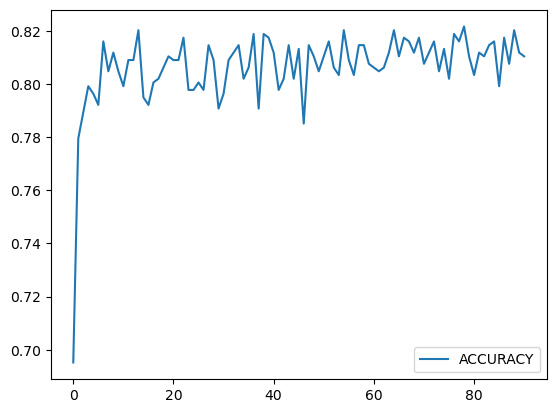

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.90      0.89       114
     class 1       0.82      0.78      0.80        65

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179

ROC Curve: Test


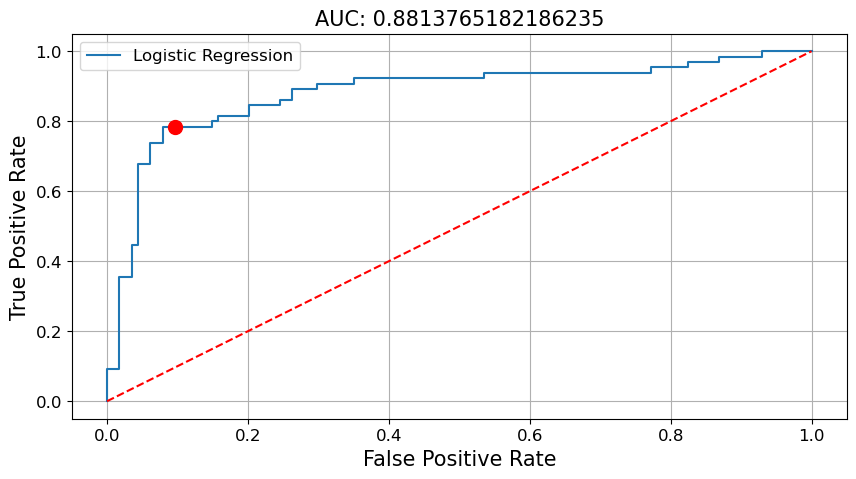

Accuracy  AUC
Train      0.84 0.81
Test       0.86 0.84

In [30]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
MONITOR = 'loss'
FILENAME = os.path.join(os.getcwd(),'Model','Titanic_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
pd.DataFrame(model_fit.history[METRICS[0]], columns=[METRICS[0].upper()]).plot()
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

### Best Model Loading and Prediction

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.84      0.95      0.89       114
     class 1       0.88      0.68      0.77        65

    accuracy                           0.85       179
   macro avg       0.86      0.81      0.83       179
weighted avg       0.85      0.85      0.84       179

ROC Curve: Test


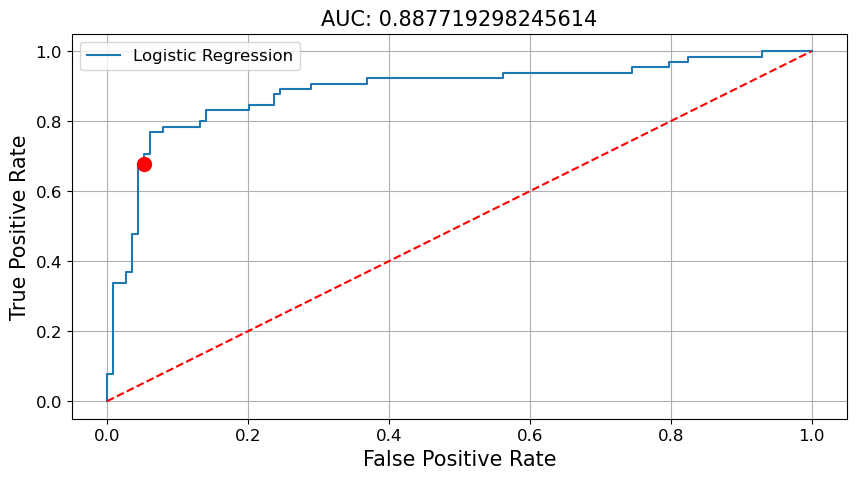

Accuracy  AUC
Train      0.81 0.77
Test       0.85 0.81

In [31]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

### Test Validation

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_81 (Dense)            (None, 256)               4352      
                                                                 
 dropout_44 (Dropout)        (None, 256)               0         
                                                                 
 dense_82 (Dense)            (None, 128)               32896     
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_83 (Dense)            (None, 64)                8256      
                                                                 
 dropout_46 (Dropout

Training:   0%|                                                                                               …

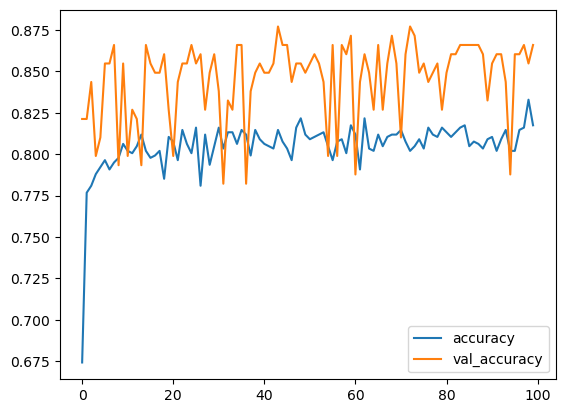

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.89      0.90      0.90       114
     class 1       0.83      0.80      0.81        65

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179

ROC Curve: Test


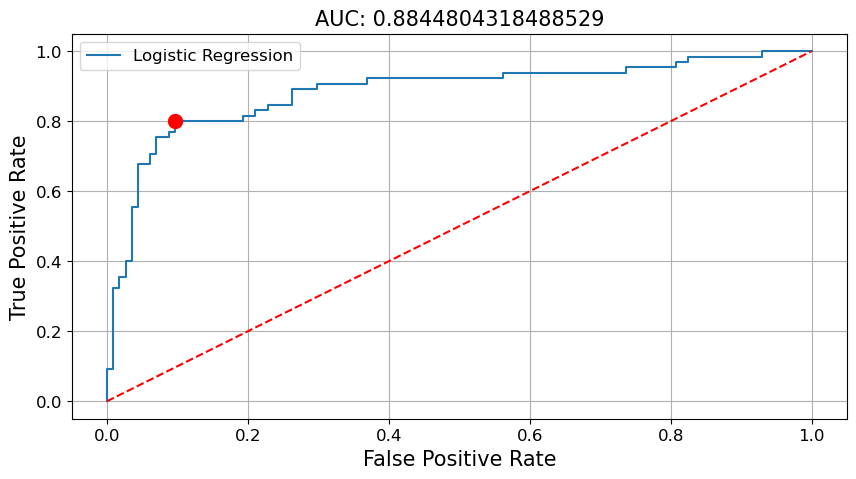

Accuracy  AUC
Train      0.83 0.81
Test       0.87 0.85

In [32]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Titanic_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      validation_data=(X_test_fes, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.91      0.90       114
     class 1       0.84      0.78      0.81        65

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.87      0.86       179

ROC Curve: Test


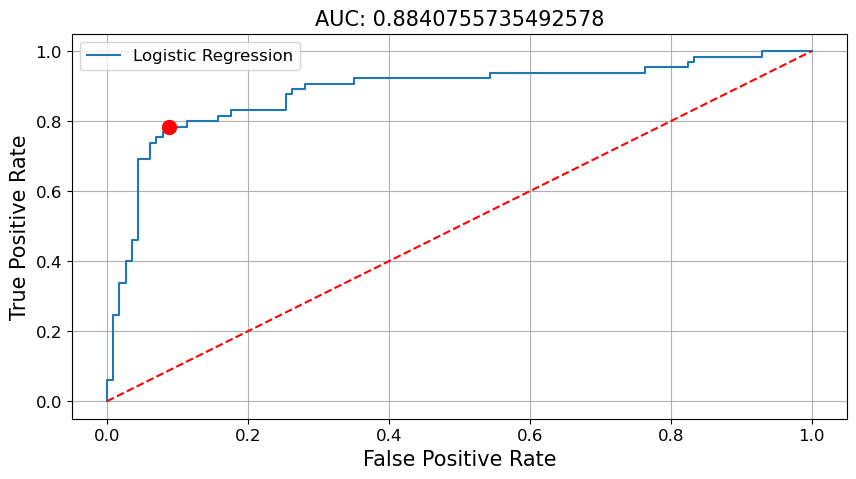

Accuracy  AUC
Train      0.83 0.80
Test       0.87 0.85

In [33]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

## Wide and Deep Architecture

> **"Wide & deep은 `2016년 구글`이 발표한 논문으로, `Memorization과 Generalization을 동시에` 수행할 수 있는 `추천시스템 모델`이며 `구글 플레이스토어`의 추천시스템에 활용되어 매우 효율적이며 효과적인 성능"**

<center><img src='Image/Expert/WideDeep.PNG' width='1000'>(Chen et al., 2016 Wide & deep learning for recommender systems. CoRR, abs/1606.07792, 2016.)</center>

### Simple Version

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 dense_86 (Dense)               (None, 256)          4352        ['input_20[0][0]']               
                                                                                                  
 dropout_48 (Dropout)           (None, 256)          0           ['dense_86[0][0]']               
                                                                                                  
 dense_87 (Dense)               (None, 128)          32896       ['dropout_48[0][0]']             
                                                     

Training:   0%|                                                                                               …

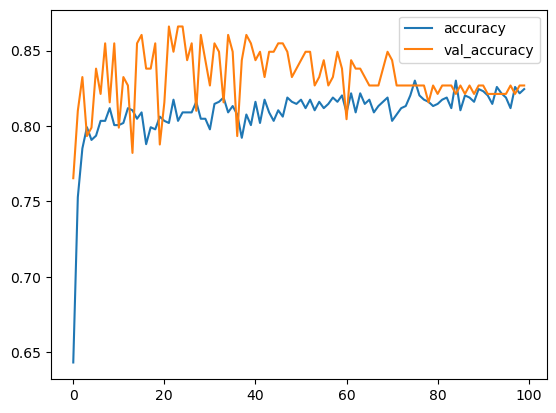

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.85      0.88      0.87       114
     class 1       0.77      0.74      0.76        65

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

ROC Curve: Test


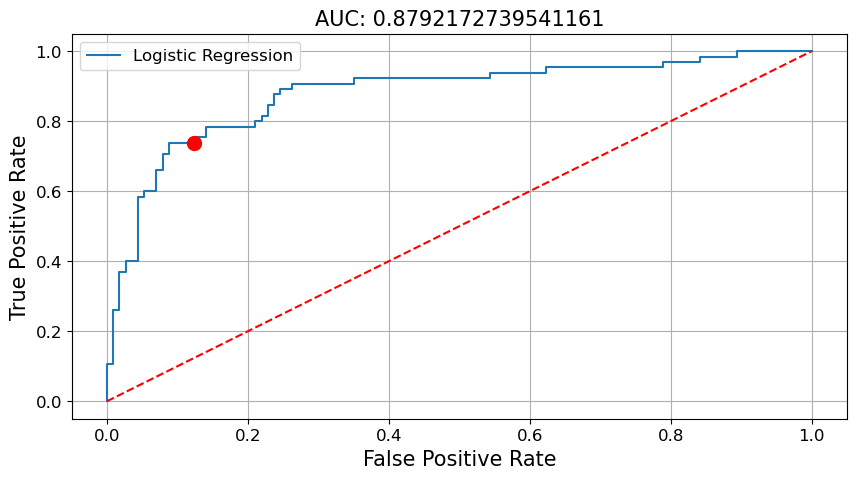

Accuracy  AUC
Train      0.82 0.81
Test       0.83 0.81

In [34]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Titanic_WideDeep.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = concatenate([inputs, hiddens])
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      validation_data=(X_test_fes, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

6/6 [==============================] - 0s 3ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.85      0.88      0.87       114
     class 1       0.77      0.74      0.76        65

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

ROC Curve: Test


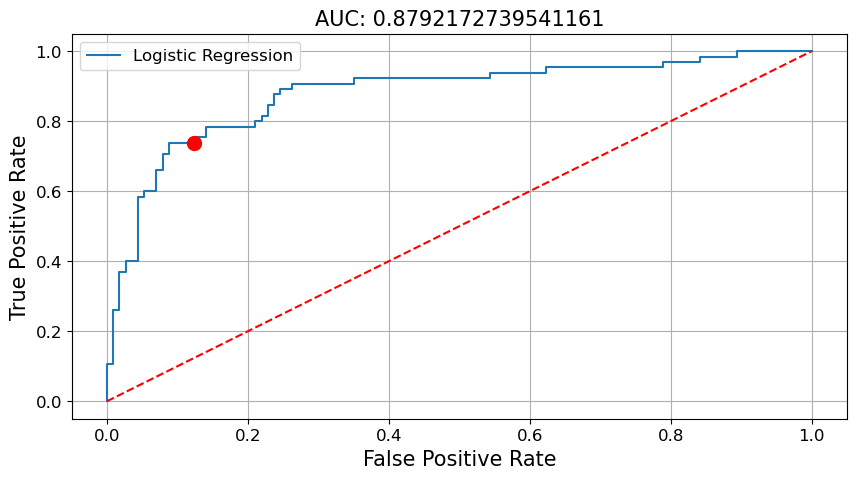

Accuracy  AUC
Train      0.82 0.81
Test       0.83 0.81

In [35]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

### Customized Version

(712, 11) (712, 1)
(179, 11) (179, 1)
Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 dense_91 (Dense)               (None, 256)          4352        ['input_22[0][0]']               
                                                                                                  
 dropout_52 (Dropout)           (None, 256)          0           ['dense_91[0][0]']               
                                                                                                  
 dense_92 (Dense)               (None, 128)          32896       ['dropout_52[0][0]']             
                                                     

Training:   0%|                                                                                               …

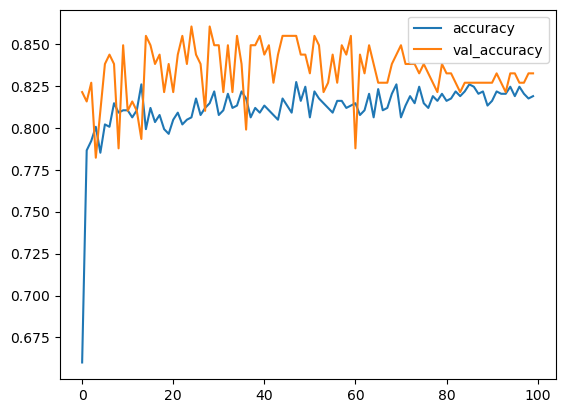

6/6 [==============================] - 0s 2ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.86      0.89      0.87       114
     class 1       0.79      0.74      0.76        65

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC Curve: Test


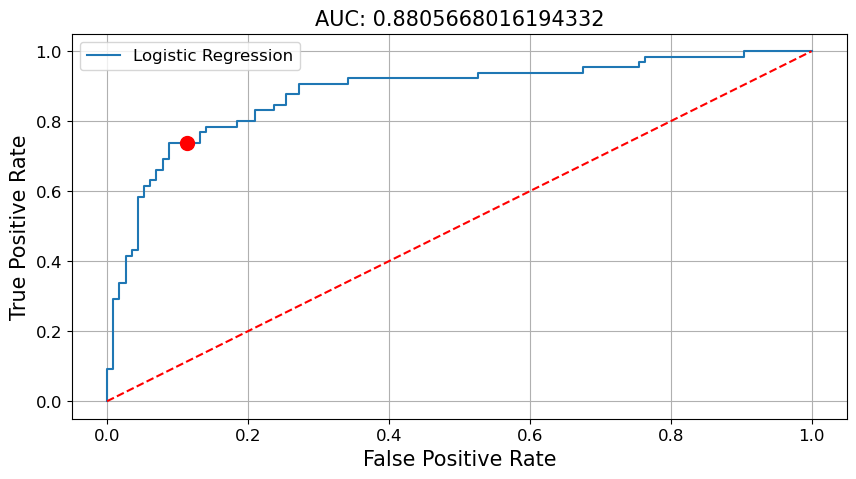

Accuracy  AUC
Train      0.83 0.81
Test       0.83 0.81

In [36]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 3
EPOCHS = 100
VERBOSE = 0
################
EARLYSTOP_PATIENT = 50
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Titanic_WideDeep.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_classification import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Neural Network
## 네트워크 구축
###
INPUT_WIDE = X_train_fes.shape[1]
INPUT_DEEP = X_train_fes.shape[1]
X_trainW, X_trainD = X_train_fes.iloc[:,:INPUT_WIDE], X_train_fes.iloc[:,:INPUT_DEEP]
X_testW, X_testD = X_test_fes.iloc[:,:INPUT_WIDE], X_test_fes.iloc[:,:INPUT_DEEP]
X_train_fes = (X_trainW, X_trainD)
X_test_fes = (X_testW, X_testD)
###

inputW = Input(shape=(INPUT_WIDE,))
inputD = Input(shape=(INPUT_DEEP,)) 
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputD)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = concatenate([inputW, hiddens])
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model([inputW, inputD], output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      validation_data=(X_test_fes, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn

6/6 [==============================] - 0s 3ms/step
Confusion Matrix: Test
Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.86      0.89      0.87       114
     class 1       0.79      0.74      0.76        65

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC Curve: Test


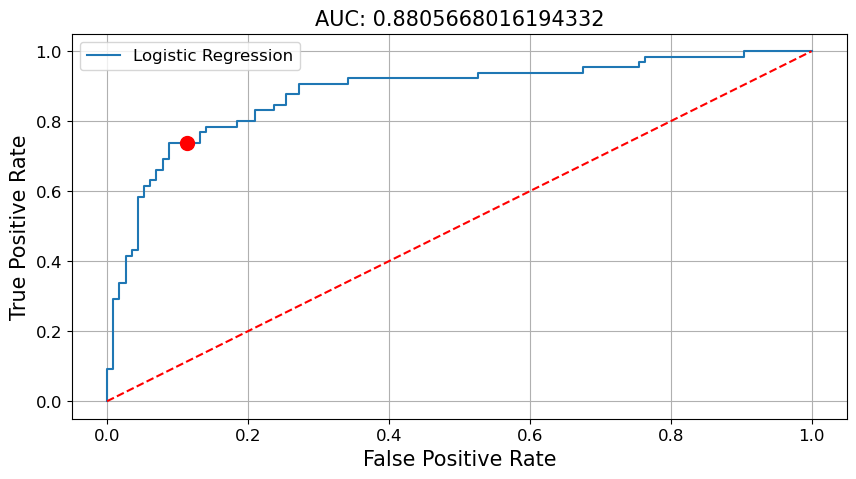

Accuracy  AUC
Train      0.83 0.81
Test       0.83 0.81

In [37]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
P_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## 성능검증
Score_nn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
Score_nn